# 머신러닝과 딥러닝을 활용한 비트코인 가격예측 데이터분석 보고서


### 요약
비트코인은 가상화폐 시장에서 중요한 역할을 하는 암호화폐입니다. 비트코인의 가격 예측은 투자자와 거래자에게 큰 관심을 받으며, 이를 위해 머신러닝과 딥러닝 모델을 활용한 분석이 진행되고 있습니다. 본 보고서에서는 단순 회귀 분석부터 복잡한 딥러닝 모델까지 다양한 방법을 사용하여 비트코인 가격 예측을 수행하고, 그 결과와 고려사항에 대해 제시합니다.

### 목차
1. [데이터 수집](#1-데이터-수집)
2. [탐색적 데이터 분석(EDA)](#2-탐색적-데이터-분석eda)
3. [모델 선택](#3-모델-선택)
4. [모델 평가](#4-모델-평가)
5. [결과 및 토의](#5-결과-및-토의)
6. [참고문헌](#6-참고문헌)
7. [결론](#7-결론)

1. 제목 및 요약
2. 서론
    - 연구의 목적과 배경 설명
    - 데이터 셋 설명
3. 데이터 수집 및 전처리
    - 사용된 데이터셋의 출처와 설명
    - 데이터의 특성과 구성요소에 대한 설명
    - 결측치, 이상치, 중복 등의 데이터 처리 방법 설명
    - 데이터 시각화를 통한 초기 EDA 결과
4. 분석
    - 특성 공학
        - 사용된 특성 및 변수 설명
        - 특성 선택 또는 추출 방법 설명
        - 특성 간 상관관계 분석 결과 제시
    - 모델 선택 및 구축
        - 사용된 머신러닝/딥러닝 알고리즘 설명
        - 선택 과정에 대한 이유
        - 모델 구조 및 파라미터 설정 설명
    - 학습 및 평가
        - 학습 데이터와 테스트 데이터 분할 방법 설명
        - 학습 및 평가 지표(r제곱, mse...)
        - 모델 학습 및 평가 결과
        - 성능 평가 및 개선점
5. 결과 및 토의
    - 예측 결과과 실제 값의 비교를 통한 모델 성능 평가
    - 모델의 장단점 및 개선 가능성 토의
    - 예측결과에 대한 해석 및 인사이트 도출
6. 결론
    - 연구 결과 요약, 결론
    - 모델 활용 가능성 및 미래 연구 방향 제시
7. 참고
8. 부록

비트코인은 시계열 데이터 중에서도 변동성이 심한 

## [1. 데이터 수집](###목차)

데이터 수집 과정에서는 수집한 데이터와 데이터의 특성을 빠르게 확인해보고, EDA 과정에서 주요 데이터에 대해 상세히 확인해보겠습니다.

### 1.1 S&P500 데이터 수집
- **수집기간:** 2013년 1월 1일부터 2023년 5월 1일까지(토요일, 일요일, 공휴일 제외)
- **데이터 항목:** 날짜(Date, 인덱스), 가격(Open, High, Low, Close, Adj Close), 거래량(Volume)

> [pandas-datareader 공식 문서](https://pandas-datareader.readthedocs.io/en/latest/index.html)

In [1]:
from pandas_datareader import data as pdr
import yfinance as yfin
from datetime import date, datetime

today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = datetime(2013,1,1)

- S&P500 데이터(데이터프레임) 모양, 헤드 확인

In [7]:
# S&P500
yfin.pdr_override()

snp500name = 'S&P500'
snp500 = '^GSPC'
snp500_df = pdr.get_data_yahoo(snp500, start=date_start, end=date_today)

print(snp500_df.shape)
snp500_df.head()

[*********************100%***********************]  1 of 1 completed
(2615, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,1462.420044,4202600000
2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,1459.369995,3829730000
2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,1466.469971,3424290000
2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,1461.890015,3304970000
2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,1457.150024,3601600000


### 1.2 비트코인 데이터 수집
- **수집기간:** ***2014년 9월 17일부터*** 2023년 5월 1일까지
- **데이터 항목:** 날짜(Date, 인덱스), 가격(Open, High, Low, Close, Adj Close), 거래량(Volume)

- BTC(KRW) 데이터(데이터프레임) 모양, 헤드 확인

In [8]:
# BTC(KRW)
yfin.pdr_override()

btc_krwname = 'Bitcoin(KRW)'
btc_krw = 'BTC-KRW'
btc_krw_df = pdr.get_data_yahoo(btc_krw, start=date_start, end=date_today)

print(btc_krw_df.shape)
btc_krw_df.head()

[*********************100%***********************]  1 of 1 completed
(3170, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,482611.81250,483811.03125,468121.03125,473203.50000,473203.50000,21787470960
2014-09-18,472713.03125,476276.53125,430991.40625,442818.25000,442818.25000,35976322560
2014-09-19,442466.65625,447515.40625,401278.37500,411989.34375,411989.34375,39571102935
2014-09-20,411861.00000,441730.53125,406862.40625,426711.75000,426711.75000,38469009780
2014-09-21,425857.09375,430387.15625,410304.03125,416189.65625,416189.65625,27737663355


- BTC(USD) 데이터(데이터프레임) 모양, 헤드, 테일 확인

In [9]:
# BTC(USD)
yfin.pdr_override()

btc_usdname = 'Bitcoin(USD)'
btc_usd = 'BTC-USD'
btc_usd_df = pdr.get_data_yahoo(btc_usd, start=date_start, end=date_today)

print(btc_usd_df.shape)
btc_usd_df.head()

[*********************100%***********************]  1 of 1 completed
(3170, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [10]:
btc_usd_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-18,27401.650391,27466.527344,26415.101562,26832.208984,26832.208984,15222938600
2023-05-19,26826.753906,27128.619141,26700.210938,26890.128906,26890.128906,11258983301
2023-05-20,26888.841797,27155.158203,26843.277344,27129.585938,27129.585938,7044911360
2023-05-21,27118.423828,27265.917969,26706.921875,26753.826172,26753.826172,8647416921
2023-05-22,26749.892578,27045.734375,26549.734375,26851.277344,26851.277344,11056770492


- 거래소 데이터 수집: 비트코인에 대하여

거래소간 데이터 차이를 확인하기 위해 빗썸, 업비트, 바이낸스, OKEX의 비트코인 종가를 확인해봅니다. 데이터는 `ccxt` 라이브러리에서  2022년 5월 25일부터 2023년 5월 25일까지의 데이터를 불러옵니다.

In [314]:
import ccxt
import datetime
import pandas as pd

exchanges = [
    ccxt.binance(),
    ccxt.okex(),
    ccxt.upbit(),
    ccxt.bithumb()
]


ohlcv_data = []

for ex in exchanges:
    from_ts = ccxt.Exchange.parse8601('2022-05-25 00:00:00')

    if ex.id in ['upbit', 'bithumb']:
        symbol = 'BTC/KRW'  # Upbit, Bithumb, Coinone은 BTC/USDT가 아닌 BTC/KRW를 사용
    else:
        symbol = 'BTC/USDT'
    
    ohlcv = ex.fetch_ohlcv(symbol, '1d', since=from_ts, limit=365)
    ohlcv_data.append(ohlcv)

dfs = []

for i, ohlcv in enumerate(ohlcv_data):
    exchange_name = exchanges[i].id
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['exchange'] = exchange_name
    dfs.append(df)

combined_df = pd.concat(dfs)
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], unit='ms')
combined_df.set_index('timestamp', inplace=True)


print('Binance')
print(combined_df[combined_df['exchange'] == 'binance'].head())

print('OKEX')
print(combined_df[combined_df['exchange'] == 'okex'].head())

print('Upbit')
print(combined_df[combined_df['exchange'] == 'upbit'].head())

print('Bithumb')
print(combined_df[combined_df['exchange'] == 'bithumb'].head())


Binance
                open      high       low     close       volume exchange
timestamp                                                               
2022-05-25  29654.58  30223.74  29294.21  29542.15  59537.38659  binance
2022-05-26  29542.14  29886.64  28019.56  29201.35  94581.65463  binance
2022-05-27  29201.35  29397.66  28282.90  28629.80  90998.52010  binance
2022-05-28  28629.81  29266.00  28450.00  29031.33  34479.35127  binance
2022-05-29  29031.33  29587.78  28839.21  29468.10  27567.34764  binance
OKEX
               open     high      low    close        volume exchange
timestamp                                                            
2022-07-29  23845.2  24444.0  23407.9  23771.5  16386.126922     okex
2022-07-30  23771.5  24666.0  23501.4  23637.5  11327.747465     okex
2022-07-31  23637.5  24193.5  23230.8  23297.2  10281.034489     okex
2022-08-01  23293.5  23499.8  22838.2  23264.5  15154.081705     okex
2022-08-02  23265.8  23467.8  22646.6  22981.3  14667.58

- 업비트와 빗썸은 원화, 바이낸스와 OKEX는 달러입니다.
- 바이낸스는 2022년 5월 25일부터 2023년 5월 25일까지, OKEX는 2022년 7월 29일부터 2023년 5월 25일까지, 업비트는 2022년 11월 6일부터 2023년 5월 25일까지, 빗썸은 2022년 5월 25일부터 2023년 5월 25일까지 제공받았습니다.

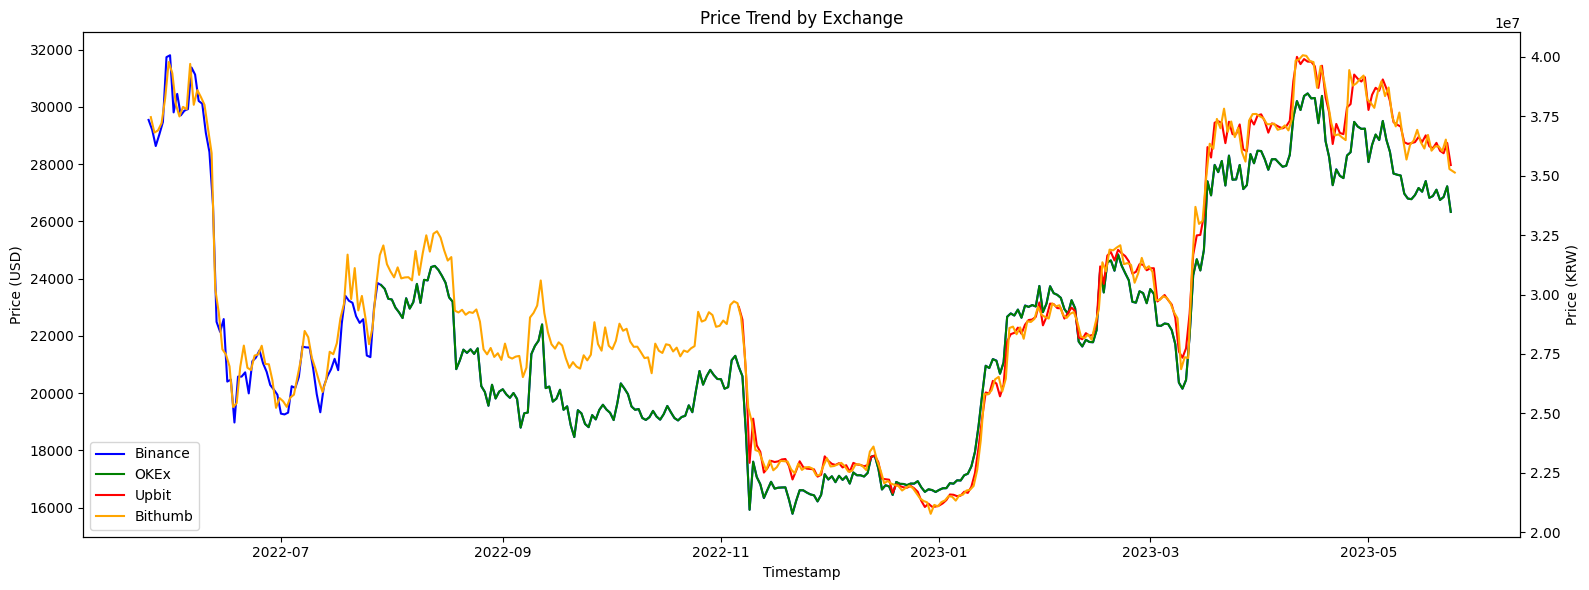

In [315]:
import matplotlib.pyplot as plt

# Binance와 OKEx의 데이터를 선택
binance_data = combined_df[combined_df['exchange'] == 'binance']
okex_data = combined_df[combined_df['exchange'] == 'okex']

# Upbit, Bithumb, Coinone의 데이터를 선택
upbit_data = combined_df[combined_df['exchange'] == 'upbit']
bithumb_data = combined_df[combined_df['exchange'] == 'bithumb']

# 시각화 설정
fig, ax1 = plt.subplots(figsize=(16, 6))
ax2 = ax1.twinx()

# Binance와 OKEx의 데이터를 plot
ax1.plot(binance_data.index, binance_data['close'], label='Binance', color='blue')
ax1.plot(okex_data.index, okex_data['close'], label='OKEx', color='green')

# Upbit, Bithumb, Coinone의 데이터를 plot
ax2.plot(upbit_data.index, upbit_data['close'], label='Upbit', color='red')
ax2.plot(bithumb_data.index, bithumb_data['close'], label='Bithumb', color='orange')

# 축과 레이블 설정
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Price (USD)')
ax2.set_ylabel('Price (KRW)')

# 범례 표시
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='lower left')

# 그래프 표시
plt.title('Price Trend by Exchange')
plt.tight_layout()
plt.show()

- 거래소 간 BTC의 가격의 추세는 유사하지만, 실제 가격은 거래소 간 매도/매수 주문량, 환율 등으로 인한 차이가 있었습니다.
- 원화 거래소(Upbit, Bithumb)간 일간 가격 차이(단기)에서 유의미한 격차를 확인할 수 있습니다. 그러나 이는 장기적인 추세에서는 거의 동일하다고 볼 수 있는 차이입니다.
- 달러 거래소와 원화 거래소의 차이는 환율을 배제하고 보더라도 단기적으로 큰 차이를 보입니다. 그러나 이는 장기적인 추세에서 유사한 변동성을 보여줍니다.


- 비트코인 해시레이트(Hashrate)
해시레이트는 비트코인 네트워크에서 수행되는 해시작업의 속도나 처리량을 나타내는 지표입니다. 해시 작업은 암호학적인 해시 함수를 사용해 블록체인 상에서 새로운 블록에 대한 작업을 수행하는 것을 의미합니다.

해시레이트는 초당 수행되는 해시 작업의 양을 표시합니다. 이는 hash/s 또는 hash/ms 과 같은 단위로 표시할 수 있습니다. 해시레이트가 높을수록 네트워크는 더 많은 작업을 수행할 수 있고, 보안과 신뢰성이 높아집니다.

비트코인의 모든 거래는 분산원장의 개념으로서 블록에 기록되기 위해 해시작업이 수행되어야 합니다. 이때 해시레이트는 이러한 각각의 트랜잭션에 기여하게 됩니다.

일반적으로 해시레이트와 비트코인 가격 사이에는 양의 상관관계가 있다고 알려져 있습니다. 비트코인 가격 상승은 해시작업에 기여하는 채굴자들에게 더 많은 이익을 제공하므로 채굴자들이 더 많은 컴퓨팅 리소스를 제공하기 때문입니다. 그러나 해시레이트 증가에 따라 채굴 난이도가 조정되므로 실제 비트코인 가격과 해시레이트의 관계는 복잡한 관계성을 지닙니다.

In [316]:
import quandl

# Quandl API 키 설정
quandl.ApiConfig.api_key = 'Nvs1qJzWimszHvXmLGPQ'

# Bitcoin 해시레이트 데이터 가져오기
hr_df = quandl.get('BCHAIN/HRATE')

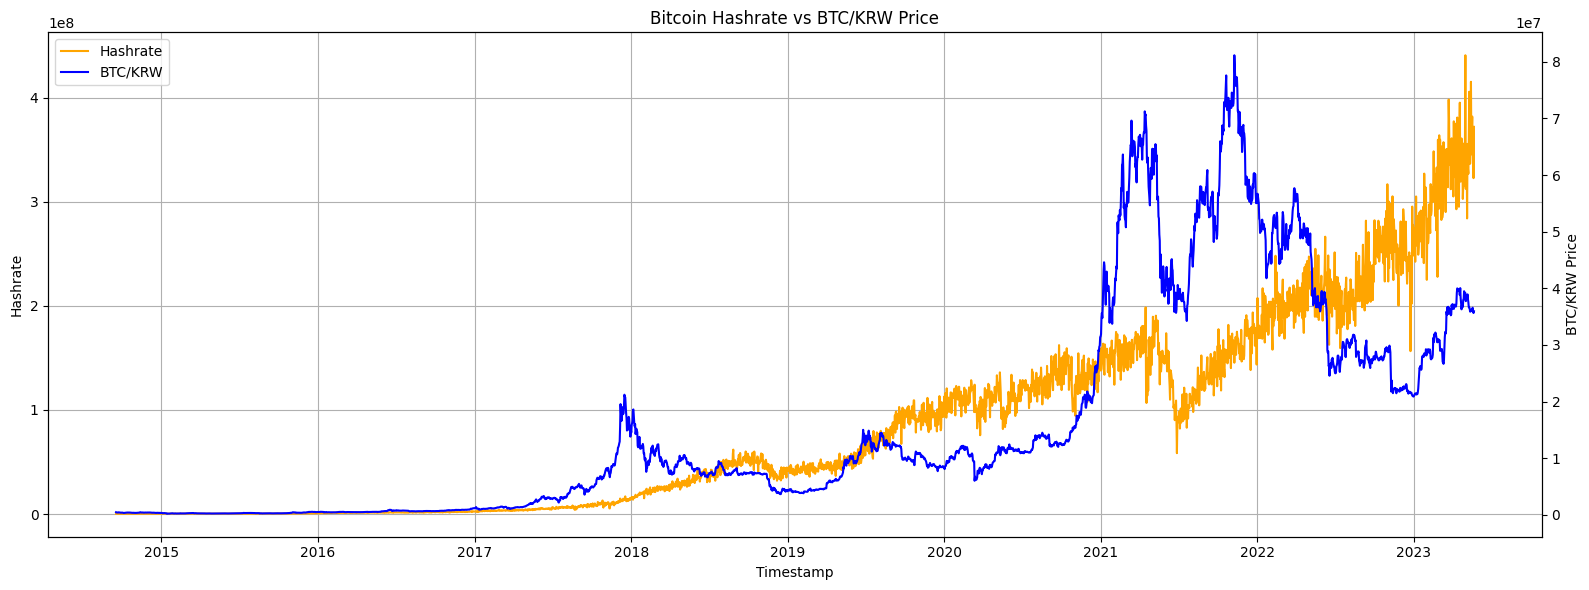

In [321]:
import matplotlib.pyplot as plt

# 시각화 설정
fig, ax1 = plt.subplots(figsize=(16, 6))
ax2 = ax1.twinx()

# 해시레이트 데이터 plot
hr_df_subset = hr_df['2014-09-17':'2023-05-21']
ax1.plot(hr_df_subset.index, hr_df_subset['Value'], label='Hashrate', color='orange')

# btc_krw_df 데이터 plot
btc_krw_df_subset = btc_krw_df['2014-09-17':'2023-05-21']
ax2.plot(btc_krw_df_subset.index, btc_krw_df_subset['Adj Close'], label='BTC/KRW', color='blue')

# 축과 레이블 설정
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Hashrate')
ax2.set_ylabel('BTC/KRW Price')

# 범례 표시
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# 그래프 표시
ax1.grid()
plt.title('Bitcoin Hashrate vs BTC/KRW Price')
plt.tight_layout()
plt.show()

### 1.3 외부요인 데이터 수집

1. 미국 국채 10년물 수익률(Treasury Yield 10 Years)
    - **수집기간:** 2013년 1월 1일부터 2023년 5월 1일까지(토요일, 일요일, 공휴일 제외)
    - **데이터 항목:** 날짜(Date, 인덱스), 가격(Open, High, Low, Close, Adj Close), 거래량(Volume)

---
2. *더 정교한 모델 생성을 위한 외부요인 데이터 수집은 [4. 모델선택](#4-모델-선택) 과정에서 수행합니다.*

- 미국 국채 10년물 수익률 데이터(데이터프레임) 모양, 헤드 확인

In [11]:
# 미국 국채 10년물 수익률
yfin.pdr_override()

tnxname = 'Treasury Yield 10 Years'
tnx = '^TNX'
tnx_df = pdr.get_data_yahoo(tnx, start=date_start, end=date_today)

print(tnx_df.shape)
tnx_df.head(5)

[*********************100%***********************]  1 of 1 completed
(2613, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,1.842,1.860,1.825,1.839,1.839,0
2013-01-03,1.844,1.911,1.835,1.899,1.899,0
2013-01-04,1.952,1.965,1.911,1.915,1.915,0
2013-01-07,1.904,1.917,1.892,1.903,1.903,0
2013-01-08,1.894,1.894,1.864,1.871,1.871,0


In [12]:
# 금 선물
yfin.pdr_override()

gldname = 'GOLD Future'
gld = 'GC=F'
gld_df = pdr.get_data_yahoo(gld, start=date_start, end=date_today)

print(gld_df.shape)
gld_df.head(5)

[*********************100%***********************]  1 of 1 completed
(2614, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,1672.800049,1693.800049,1670.000000,1687.900024,1687.900024,35
2013-01-03,1686.099976,1686.800049,1662.000000,1673.699951,1673.699951,140
2013-01-04,1647.000000,1658.300049,1625.699951,1648.099976,1648.099976,199
2013-01-07,1656.500000,1659.900024,1643.800049,1645.500000,1645.500000,49
2013-01-08,1647.699951,1661.500000,1647.699951,1661.500000,1661.500000,17


In [363]:
# ETH/KRW
yfin.pdr_override()

ethname = 'Bitcoin(KRW)'
eth = 'ETH-KRW'
eth_df = pdr.get_data_yahoo(eth, start=date_start, end=date_today)

print(eth_df.shape)
eth_df.head(5)

[*********************100%***********************]  1 of 1 completed
(2019, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-11,334377.50000,357745.84375,333936.250,352401.81250,352401.81250,943267611911
2017-11-12,352411.90625,357409.87500,334295.750,344358.12500,344358.12500,1804483690823
2017-11-13,343370.62500,368120.37500,343868.000,354550.90625,354550.90625,1166354161489
2017-11-14,354603.50000,380059.34375,354742.875,376732.06250,376732.06250,1193559640799
2017-11-15,377103.59375,379043.00000,364248.750,368699.50000,368699.50000,799283031624


### 1.4 수집 데이터 확인: 개괄적으로

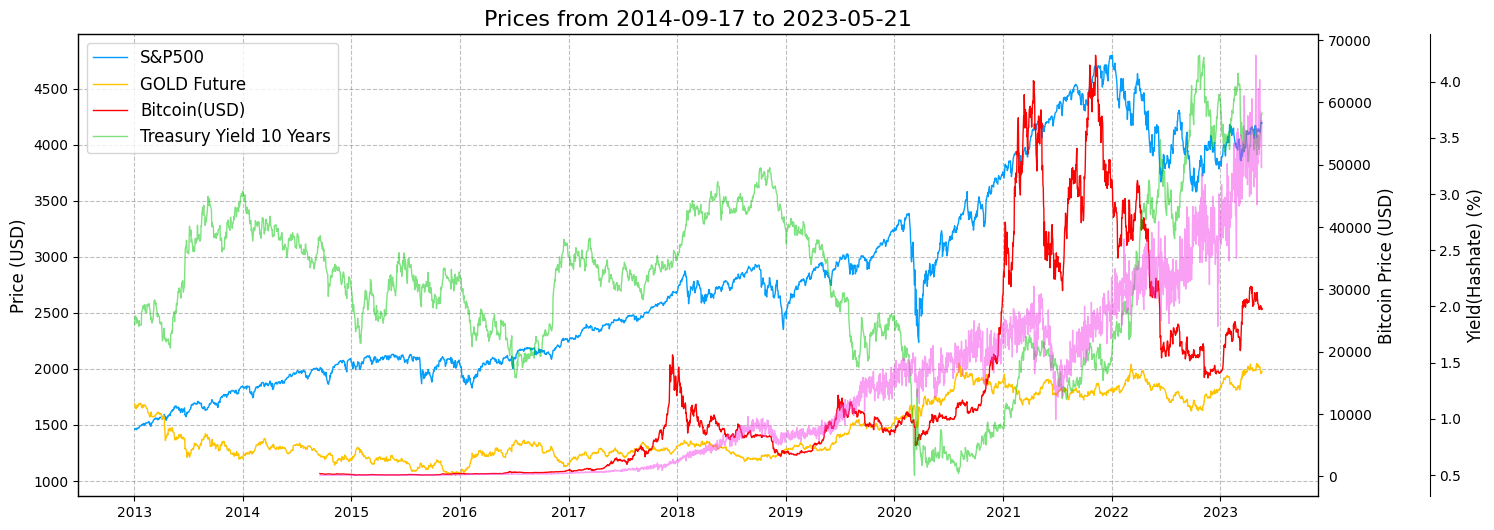

In [357]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

pd.plotting.register_matplotlib_converters()
years = mdates.YearLocator()

fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.xaxis.set_major_locator(years)

# S&P500 플로팅
x1 = snp500_df.index
y1 = snp500_df['Adj Close']
ax1.plot(x1, y1, color='#039dfc', label=snp500name, linewidth=1.0)

# GOLD 플로팅
x2 = gld_df.index
y2 = gld_df['Adj Close']
ax1.plot(x2, y2, color='#ffc400', label=gldname, linewidth=1.0)

# BTC/USD 플로팅 (별도의 y축)
ax2 = ax1.twinx()
x3 = btc_usd_df.index
y3 = btc_usd_df['Adj Close']
ax2.plot(x3, y3, color='#fc0303', label=btc_usdname, linewidth=1.0)

# TNX 플로팅
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 80))
x5 = tnx_df.index
y5 = tnx_df['Adj Close']
ax3.plot(x5, y5, color='#01c703', label=tnxname, linewidth=1.0, alpha=0.5)

# 해시레이트 플로팅 (TNX y축 공유)
ax4 = ax1.twinx()
ax4.yaxis.set_visible(False)
x4 = hr_df_subset.index
y4 = hr_df_subset['Value']
ax4.plot(x4, y4, color='#f542ec', label='Hashrate', linewidth=1.0, alpha=0.5)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left', fontsize=12, frameon=True, facecolor='white')

ax1.set_ylabel('Price (USD)', fontsize=12)
ax2.set_ylabel('Bitcoin Price (USD)', fontsize=12)
ax3.set_ylabel('Yield(Hashate) (%)', fontsize=12)

ax1.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
plt.title('Prices from 2014-09-17 to 2023-05-21', fontsize=16)
plt.show()

- S&P500 Price와 GOLD Future(좌측)는 Bticoin Price(USD)(우측)에 비해 축소된 y축을 가지고 있으며, TNX Yield와 Hashrate(우측 개별)는 수익률을 표시하고 있습니다.

#### 1.4.1 추세선(Trend)

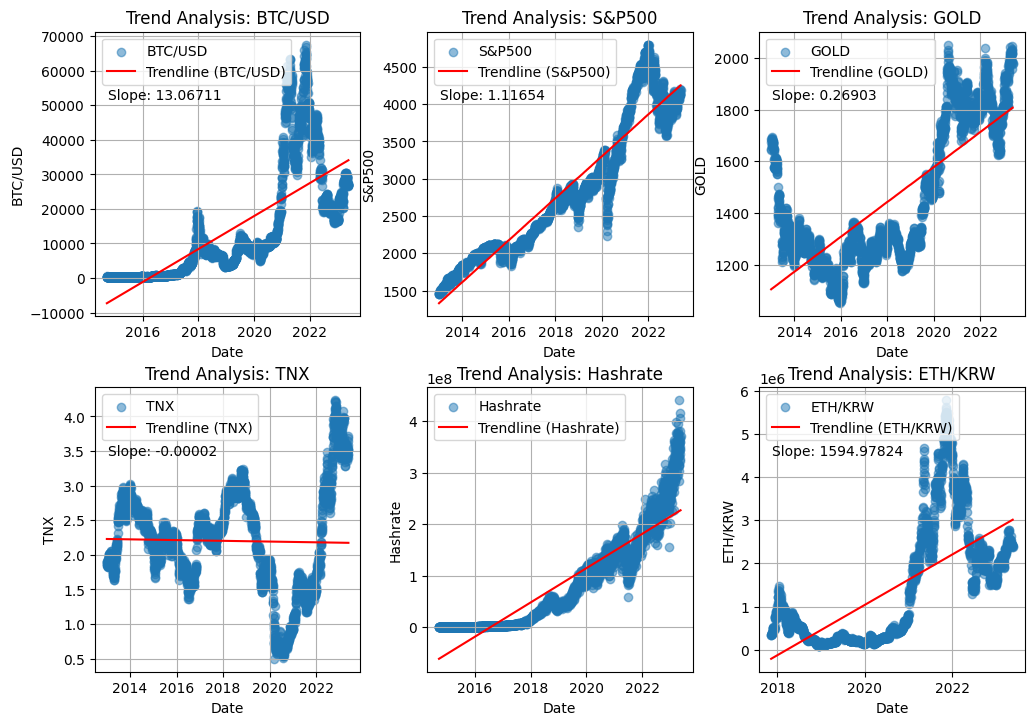

In [369]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

# 서브플롯 설정
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# BTC/USD 추세 시각화
axs[0, 0].scatter(btc_usd_df.index, btc_usd_df['Adj Close'], label='BTC/USD', alpha=0.5)
x_btc = np.arange(len(btc_usd_df.index)).reshape(-1, 1)
model_btc = LinearRegression()
model_btc.fit(x_btc, btc_usd_df['Adj Close'])
y_pred_btc = model_btc.predict(x_btc)
axs[0, 0].plot(btc_usd_df.index, y_pred_btc, color='red', label='Trendline (BTC/USD)')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('BTC/USD')
axs[0, 0].set_title('Trend Analysis: BTC/USD')
axs[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # x 축의 날짜 형식 지정
axs[0, 0].xaxis.set_major_locator(mdates.YearLocator(2))
axs[0, 0].legend()
axs[0, 0].grid(True)

# BTC/USD 추세 기울기 표시
slope_btc = model_btc.coef_[0]
slope_text_btc = f'Slope: {slope_btc:.5f}'
axs[0, 0].text(0.05, 0.8, slope_text_btc, transform=axs[0, 0].transAxes, verticalalignment='top')


# S&P500 추세 시각화
axs[0, 1].scatter(snp500_df.index, snp500_df['Adj Close'], label='S&P500', alpha=0.5)
x_snp = np.arange(len(snp500_df.index)).reshape(-1, 1)
model_snp = LinearRegression()
model_snp.fit(x_snp, snp500_df['Adj Close'])
y_pred_snp = model_snp.predict(x_snp)
axs[0, 1].plot(snp500_df.index, y_pred_snp, color='red', label='Trendline (S&P500)')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('S&P500')
axs[0, 1].set_title('Trend Analysis: S&P500')
axs[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # x 축의 날짜 형식 지정
axs[0, 1].xaxis.set_major_locator(mdates.YearLocator(2))
axs[0, 1].legend()
axs[0, 1].grid(True)

# S&P500 추세 기울기 표시
slope_snp = model_snp.coef_[0]
slope_text_snp = f'Slope: {slope_snp:.5f}'
axs[0, 1].text(0.05, 0.8, slope_text_snp, transform=axs[0, 1].transAxes, verticalalignment='top')


# GOLD 추세 시각화
axs[0, 2].scatter(gld_df.index, gld_df['Adj Close'], label='GOLD', alpha=0.5)
x_gld = np.arange(len(gld_df.index)).reshape(-1, 1)
model_gld = LinearRegression()
model_gld.fit(x_gld, gld_df['Adj Close'])
y_pred_gld = model_gld.predict(x_gld)
axs[0, 2].plot(gld_df.index, y_pred_gld, color='red', label='Trendline (GOLD)')
axs[0, 2].set_xlabel('Date')
axs[0, 2].set_ylabel('GOLD')
axs[0, 2].set_title('Trend Analysis: GOLD')
axs[0, 2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # x 축의 날짜 형식 지정
axs[0, 2].xaxis.set_major_locator(mdates.YearLocator(2))
axs[0, 2].legend()
axs[0, 2].grid(True)

# GOLD 추세 기울기 표시
slope_gld = model_gld.coef_[0]
slope_text_gld = f'Slope: {slope_gld:.5f}'
axs[0, 2].text(0.05, 0.8, slope_text_gld, transform=axs[0, 2].transAxes, verticalalignment='top')


# TNX 추세 시각화
axs[1, 0].scatter(tnx_df.index, tnx_df['Adj Close'], label='TNX', alpha=0.5)
x_tnx = np.arange(len(tnx_df.index)).reshape(-1, 1)
model_tnx = LinearRegression()
model_tnx.fit(x_tnx, tnx_df['Adj Close'])
y_pred_tnx = model_tnx.predict(x_tnx)
axs[1, 0].plot(tnx_df.index, y_pred_tnx, color='red', label='Trendline (TNX)')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('TNX')
axs[1, 0].set_title('Trend Analysis: TNX')
axs[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # x 축의 날짜 형식 지정
axs[1, 0].xaxis.set_major_locator(mdates.YearLocator(2))
axs[1, 0].legend()
axs[1, 0].grid(True)

# TNX 추세 기울기 표시
slope_tnx = model_tnx.coef_[0]
slope_text_tnx = f'Slope: {slope_tnx:.5f}'
axs[1, 0].text(0.05, 0.8, slope_text_tnx, transform=axs[1, 0].transAxes, verticalalignment='top')

# Hashrate 추세 시각화
axs[1, 1].scatter(hr_df_subset.index, hr_df_subset['Value'], label='Hashrate', alpha=0.5)
x_hr = np.arange(len(hr_df_subset.index)).reshape(-1, 1)
model_hr = LinearRegression()
model_hr.fit(x_hr, hr_df_subset['Value'])
y_pred_hr = model_hr.predict(x_hr)
axs[1, 1].plot(hr_df_subset.index, y_pred_hr, color='red', label='Trendline (Hashrate)')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Hashrate')
axs[1, 1].set_title('Trend Analysis: Hashrate')
axs[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # x 축의 날짜 형식 지정
axs[1, 1].xaxis.set_major_locator(mdates.YearLocator(2))
axs[1, 1].legend()
axs[1, 1].grid(True)

# Hashrate 추세 기울기 표시
slope_hr = model_hr.coef_[0]
slope_text_hr = f'Slope: {slope_hr:.5f}'
axs[1, 1].text(0.05, 0.8, slope_text_hr, transform=axs[1, 2].transAxes, verticalalignment='top')

# ETH/KRW 추세 시각화
axs[1, 2].scatter(eth_df.index, eth_df['Adj Close'], label='ETH/KRW', alpha=0.5)
x_eth = np.arange(len(eth_df.index)).reshape(-1, 1)
model_eth = LinearRegression()
model_eth.fit(x_eth, eth_df['Adj Close'])
y_pred_eth = model_eth.predict(x_eth)
axs[1, 2].plot(eth_df.index, y_pred_eth, color='red', label='Trendline (ETH/KRW)')
axs[1, 2].set_xlabel('Date')
axs[1, 2].set_ylabel('ETH/KRW')
axs[1, 2].set_title('Trend Analysis: ETH/KRW')
axs[1, 2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # x 축의 날짜 형식 지정
axs[1, 2].xaxis.set_major_locator(mdates.YearLocator(2))
axs[1, 2].legend(loc='upper left')
axs[1, 2].grid(True)

# ETH/KRW 추세 기울기 표시
slope_eth = model_eth.coef_[0]
slope_text_eth = f'Slope: {slope_eth:.5f}'
axs[1, 2].text(0.05, 0.8, slope_text_eth, transform=axs[1, 2].transAxes, verticalalignment='top')

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.25, hspace=0.25)
plt.show()

각 추세선의 기울기는 해당 데이터의 시간에 따른 경향성을 보여줍니다. 기울기는 선형 회귀 모델(`LinearRegression()`)을 사용하여 데이터포인트의 시간에 따른 변화를 가장 잘 표현하는 선을 채택하여 사용하였습니다. 추가로 ETH/KRW(이더리움/원화)의 추세선을 표시하였습니다.

> 기울기의 값이 양수인 경우, 해당 데이터의 추세는 시간이 지남에 따라 증가하는 경향을 보이고, 반대로 음수인 경우 감소하는 경향을 보입니다. 기울기가 0인 경우(또는 0에 가까운 경우)에는 데이터의 추세는 거의 변하지 않거나 상당히 불안정함을 나타냅니다.

- 비트코인(USD)의 경우, `13.07145`의 기울기를 가지는, 시간이 지남에 따라 증가하는 경향을 보이고 있습니다. 이는 `S&P500`, `Gold`, `TNX`에 비해 상당히 큰 기울기 값을 가지고 있으나, 큰 폭의 상승과 하락으로 생기는 추세선과의 넓은 간격은 변동성이 크고 불안정함으로 여겨질 수 있습니다. 이는 이후에 비트코인 데이터를 중심으로 다룰 때 살펴보겠습니다.

#### 1.4.2 계절성 박스플롯(Seasonality Boxplot)
- Box: 데이터의 25번째 백분위수(1사분위수, Q1)부터 75번째 백분위수(3사분위수, Q3)까지를 나타내는 박스(수평선은 중앙 값)
- 수염(Whiskers): 박스의 위와 아래에 있는 선분. 데이터의 전체 범위를 표현
- 이상치(Outliers): 수염범위를 벗어나는 개별 데이터 포인트

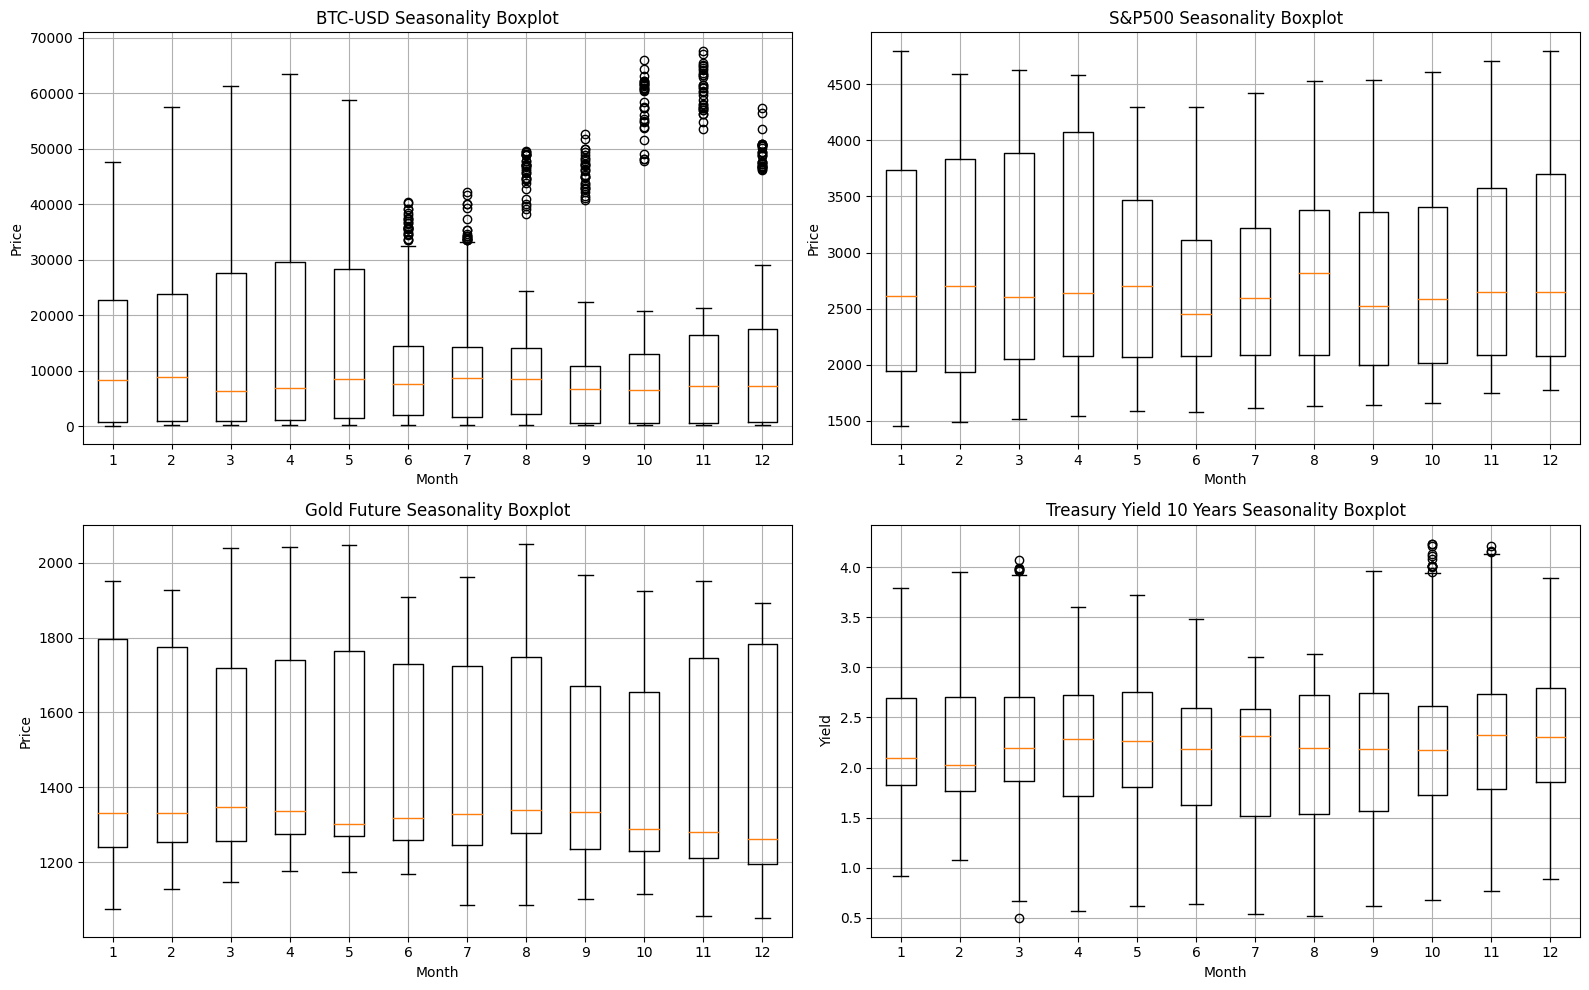

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임에서 월 또는 분기 정보 추출
btc_usd_df['Month'] = btc_usd_df.index.month
snp500_df['Month'] = snp500_df.index.month
gld_df['Month'] = gld_df.index.month
tnx_df['Month'] = tnx_df.index.month

# 월별 또는 분기별 그룹화
grouped1 = btc_usd_df.groupby('Month')['Adj Close']
grouped2 = snp500_df.groupby('Month')['Adj Close']
grouped3 = gld_df.groupby('Month')['Adj Close']
grouped4 = tnx_df.groupby('Month')['Adj Close']

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

data1 = [grouped1.get_group(month) for month in grouped1.groups]
data2 = [grouped2.get_group(month) for month in grouped2.groups]
data3 = [grouped3.get_group(month) for month in grouped3.groups]
data4 = [grouped4.get_group(month) for month in grouped4.groups]

axs[0, 0].boxplot(data1, labels=grouped1.groups.keys())
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Price')
axs[0, 0].set_title('BTC-USD Seasonality Boxplot')
axs[0, 0].grid(True)

axs[0, 1].boxplot(data2, labels=grouped2.groups.keys())
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('S&P500 Seasonality Boxplot')
axs[0, 1].grid(True)

axs[1, 0].boxplot(data3, labels=grouped1.groups.keys())
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Price')
axs[1, 0].set_title('Gold Future Seasonality Boxplot')
axs[1, 0].grid(True)

axs[1, 1].boxplot(data4, labels=grouped1.groups.keys())
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Yield')
axs[1, 1].set_title('Treasury Yield 10 Years Seasonality Boxplot')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

- 계절성 주기 확인은 BTC/USD, S&P500, Gold, TNX에 대해 수행하였습니다.
- 안전자산으로 분류되는 S&P500과 BTC, 미국 국채 10년물(수익률)에 비해 비트코인에서 이상치를 많이 확인할 수 있습니다.
- 비트코인의 이상치(상향)는 연중 3, 4분기에 몰려있는 반면, 평균치 최댓값은 1, 2분기에 몰려 있습니다.

#### 1.4.3 상관관계 히트맵

데이터 간 상관관계의 여부를 확인합니다. 시계열 데이터는 정규분포를 가지지 않을 수 있기 때문에 pearson 상관계수가 아닌 kendall 상관계수를 사용했습니다. 특히, bitcoin은 이상치가 잦게 발생하기 때문에 pearson 상관계수는 부정확한 분석 결과를 도출할 수 있습니다. kendall 상관계수는 데이터 자체가 아닌 순위를 우선 비교하므로 pearson의 단점을 보완할 수 있습니다.

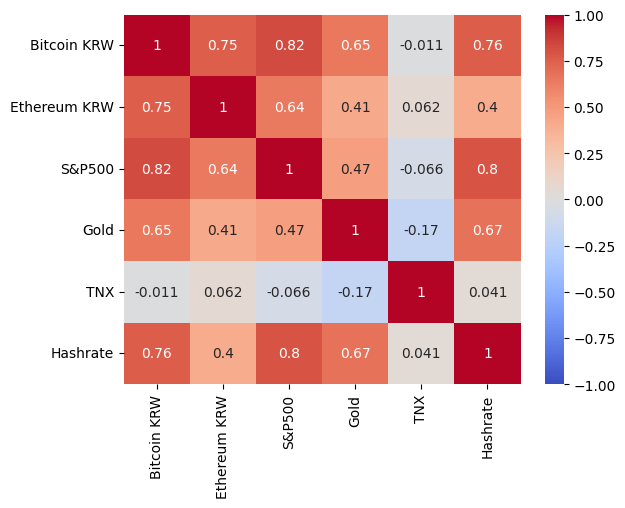

In [371]:
import seaborn as sns
# 세 데이터프레임을 하나의 데이터프레임으로 병합
merged_df = pd.concat([btc_krw_df['Adj Close'], eth_df['Adj Close'], snp500_df['Adj Close'], gld_df['Adj Close'], tnx_df['Adj Close'], hr_df_subset['Value']], axis=1)
merged_df.columns = ['Bitcoin KRW', 'Ethereum KRW', 'S&P500', 'Gold', 'TNX', 'Hashrate']

# 상관관계 행렬 생성
correlation_matrix = merged_df.corr(method='kendall')

# 히트맵 그리기
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1.0)
plt.show()

- S&P500과 Bitcoin(USD)의 상관계수는 0.82로, Ethereum KRW 보다 높은 상관관계를 가지고 있습니다.
- Hashrate는 Ethereum KRW(0.75)와 유사한 0.76의 상관계수를 가지고 있습니다.
- 한편, TNX(미국 국채 10년물 수익률)과 Bitcoin(USD)는 음의 상관관계를 가지고 있습니다.

## [2. 탐색적 데이터 분석(EDA)](###목차)

탐색적 데이터 분석(Exploratory Data Analysis, EDA)은 주어진 데이터를 탐색하고 이해하기 위해 다양한 분석 기법과 시각화 도구를 활용하는 과정입니다. EDA를 통해 데이터의 특성, 분포, 상관 관계 등을 파악하고 가설 설정 및 모델링에 도움을 줄 수 있습니다. 이제 주요 데이터인 BTC(KRW)의 탐색적 데이터 분석을 수행해보겠습니다.

### 2.1. 수집 데이터 확인: BTC-KRW를 중심으로

#### BTC-KRW 데이터 개요

In [17]:
print(btc_krw_df.shape)
print(btc_krw_df.info)
btc_krw_df.head()

(3170, 6)
<bound method DataFrame.info of                     Open          High           Low         Close   
Date                                                                 
2014-09-17  4.826118e+05  4.838110e+05  4.681210e+05  4.732035e+05  \
2014-09-18  4.727130e+05  4.762765e+05  4.309914e+05  4.428182e+05   
2014-09-19  4.424667e+05  4.475154e+05  4.012784e+05  4.119893e+05   
2014-09-20  4.118610e+05  4.417305e+05  4.068624e+05  4.267118e+05   
2014-09-21  4.258571e+05  4.303872e+05  4.103040e+05  4.161897e+05   
...                  ...           ...           ...           ...   
2023-05-18  3.630315e+07  3.662713e+07  3.558536e+07  3.657466e+07   
2023-05-19  3.657846e+07  3.670327e+07  3.529602e+07  3.582342e+07   
2023-05-20  3.581613e+07  3.599155e+07  3.542422e+07  3.563494e+07   
2023-05-21  3.563324e+07  3.598615e+07  3.557285e+07  3.595226e+07   
2023-05-22  3.593747e+07  3.613293e+07  3.539319e+07  3.545438e+07   

               Adj Close          Volume  
Date

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,482611.81250,483811.03125,468121.03125,473203.50000,473203.50000,21787470960
2014-09-18,472713.03125,476276.53125,430991.40625,442818.25000,442818.25000,35976322560
2014-09-19,442466.65625,447515.40625,401278.37500,411989.34375,411989.34375,39571102935
2014-09-20,411861.00000,441730.53125,406862.40625,426711.75000,426711.75000,38469009780
2014-09-21,425857.09375,430387.15625,410304.03125,416189.65625,416189.65625,27737663355


- index(`Date`): 날짜 인덱스 - 시계열 데이터
- `Open`: 시가
- `High`: 고가
- `Low`: 저가
- `Close`: 종가
- `Adj Close`: 조정 종가
- `Volume`: 거래량
- *`Month`: 인덱스에서 추출한 월*

#### 주요 통계량 및 분포 확인: 조정된 종가

BTC(KRW)의 주요 통계량과 가격 분포를 확인합니다. 

               Open          High           Low         Close     Adj Close   
count  3.170000e+03  3.170000e+03  3.170000e+03  3.170000e+03  3.170000e+03  \
mean   1.591254e+07  1.629594e+07  1.549709e+07  1.592144e+07  1.592144e+07   
std    1.894222e+07  1.940180e+07  1.842277e+07  1.893924e+07  1.893924e+07   
min    1.914468e+05  2.282608e+05  1.855481e+05  1.927520e+05  1.927520e+05   
25%    8.657024e+05  8.753118e+05  8.583263e+05  8.703984e+05  8.703984e+05   
50%    8.564201e+06  8.804861e+06  8.391948e+06  8.572062e+06  8.572062e+06   
75%    2.628712e+07  2.700833e+07  2.579259e+07  2.630564e+07  2.630564e+07   
max    8.111788e+07  8.103849e+07  7.826590e+07  8.113841e+07  8.113841e+07   

             Volume  
count  3.170000e+03  
mean   1.977897e+13  
std    2.316888e+13  
min    6.284822e+09  
25%    1.396025e+11  
50%    1.078759e+13  
75%    3.406779e+13  
max    3.947933e+14  


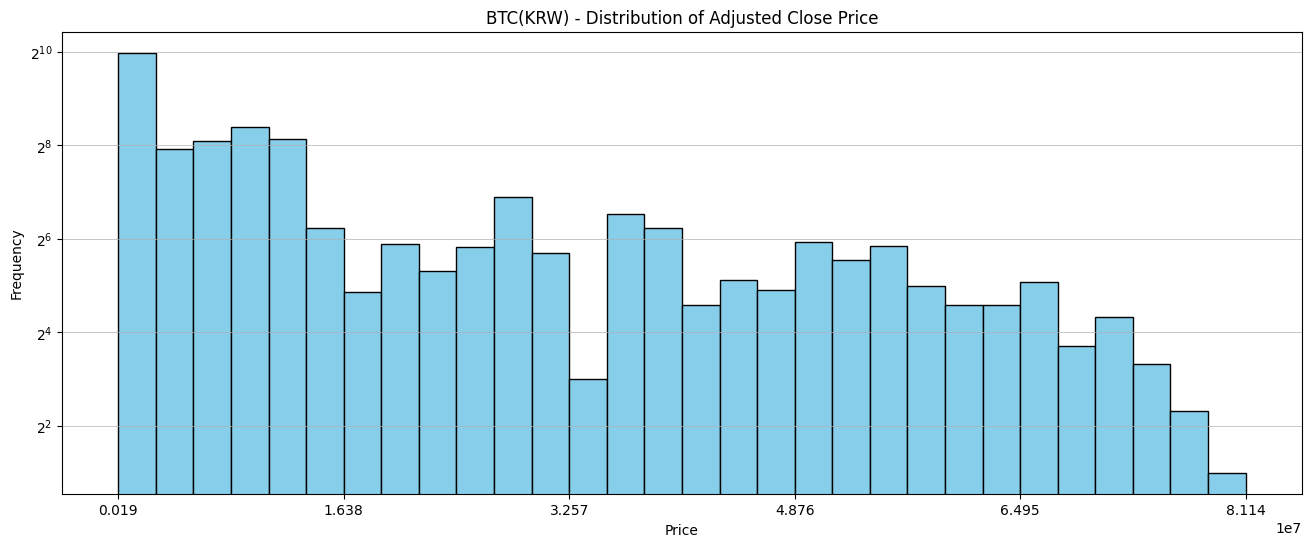

In [18]:
# 주요 통계량 및 분포 확인
print(btc_krw_df.describe())

plt.figure(figsize=(16, 6))
plt.hist(btc_krw_df['Adj Close'], bins=30, edgecolor='black', color='skyblue')
plt.title('BTC(KRW) - Distribution of Adjusted Close Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linewidth=0.5)

plt.yscale('log', base=2)
x_ticks = np.linspace(btc_krw_df['Adj Close'].min(), btc_krw_df['Adj Close'].max(), 6)
plt.xticks(x_ticks)

plt.show()

- 위 기술통계량을 확인해보면 비어있는 값이 없음을 알 수 있습니다.
- 표준편차(`std`)가 매우 크므로, 평균으로부터 멀리 퍼져 있음(변동폭이 큼)을 알 수 있습니다.

- 조정 종가의 가격분포는 특정 가격에서 큰 편차를 보이므로, 빈도(Y 축)를 밑2의 로그 스케일로 적용.
- 조정 종가의 최저가는 190,000원대, 최고가는 81,140,000원대로, 190,000원대에서 16,380,000원대에서 2^8이상 빈도가 있음을 확인할 수 있습니다.

위 기술통계량은 아래 요소분해분석과정에서 더 자세히 알아보겠습니다.

#### n차 함수 추세선 그래프

`btc_krw_df` 데이터에 대해 n차 함수 추세선을 표시해 데이터의 국부적인 패턴을 파악해봅니다.

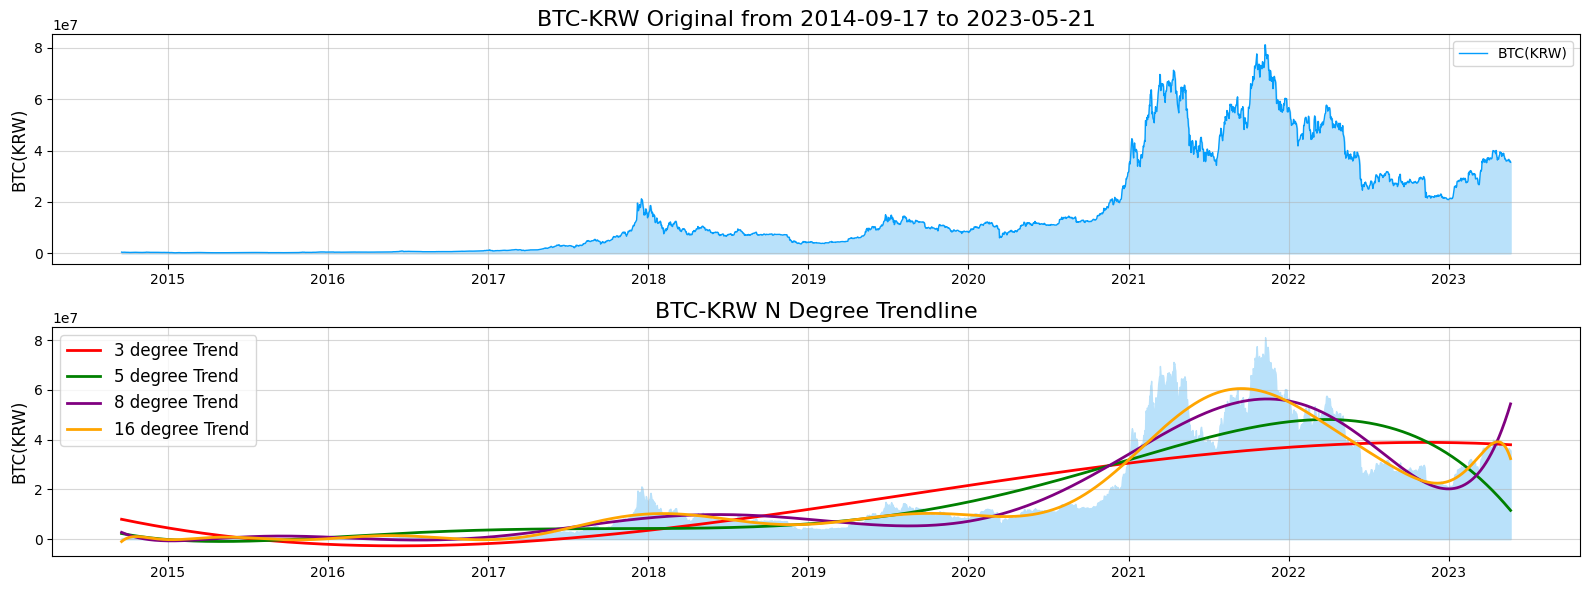

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

pd.plotting.register_matplotlib_converters()
years = mdates.YearLocator()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6))
ax1.xaxis.set_major_locator(years)
ax2.xaxis.set_major_locator(years)

x = btc_krw_df.index
y = btc_krw_df['Adj Close']
ax1.legend(['BTC-KRW'], fontsize=12)
ax1.set_title('BTC-KRW Original from 2014-09-17 to 2023-05-21', fontsize=16)
ax1.plot(y, color='#039dfc', label='BTC(KRW)', linewidth=1.0)
ax1.fill_between(x, 0, y, color='#b9e1fa')
ax1.set_ylabel('BTC(KRW)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.5)

ax2.set_title('BTC-KRW N Degree Trendline', fontsize=16)
ax2.set_ylabel('BTC(KRW)', fontsize=12)
ax2.fill_between(x, 0, y, color='#b9e1fa')

# 3차 함수 적합
poly_degree = 3
poly_coeff = np.polyfit(np.arange(len(y)), y, poly_degree)
poly_func = np.poly1d(poly_coeff)
poly_y = poly_func(np.arange(len(y)))
ax2.plot(x, poly_y, color='red', label='3 degree Trend', linewidth=2.0)

# 5차 함수 적합
poly_degree = 5
poly_coeff = np.polyfit(np.arange(len(y)), y, poly_degree)
poly_func = np.poly1d(poly_coeff)
poly_y = poly_func(np.arange(len(y)))
ax2.plot(x, poly_y, color='green', label='5 degree Trend', linewidth=2.0)

# 8차 함수 적합
poly_degree = 8
poly_coeff = np.polyfit(np.arange(len(y)), y, poly_degree)
poly_func = np.poly1d(poly_coeff)
poly_y = poly_func(np.arange(len(y)))
ax2.plot(x, poly_y, color='purple', label='8 degree Trend', linewidth=2.0)

# 16차 함수 적합
poly_degree = 16
poly_coeff = np.polyfit(np.arange(len(y)), y, poly_degree)
poly_func = np.poly1d(poly_coeff)
poly_y = poly_func(np.arange(len(y)))
ax2.plot(x, poly_y, color='orange', label='16 degree Trend', linewidth=2.0)

ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

### 2.2. 시계열 요소분해 분석(Time Series Decomposition Analysis)

#### 2.2.1 요소분해
요소분해분석은 주어진 시계열 데이터를 추세(Trend), 계절성(Seasonal), 잔차(Residual)의 세 가지 구성 요소로 분해하는 기법입니다. 이를 통해 데이터의 추세와 계절성 패턴을 파악할 수 있습니다.

다음 요소분해분석은 원계열 데이터에 대해 로그 변환된 데이터를 사용하므로, 데이터의 비선형성을 완화하고 변동성을 보다 안정적으로 만들어, 원본 데이터의 주기성을 쉽게 파악할 수 있습니다. 원계열 데이터는 시간이 지남에 따라 변동폭이 커지는 특성을 가지고 있기 때문에 곱셈분해(Multiplicative Decomposition)으로 성분을 분해하였습니다.

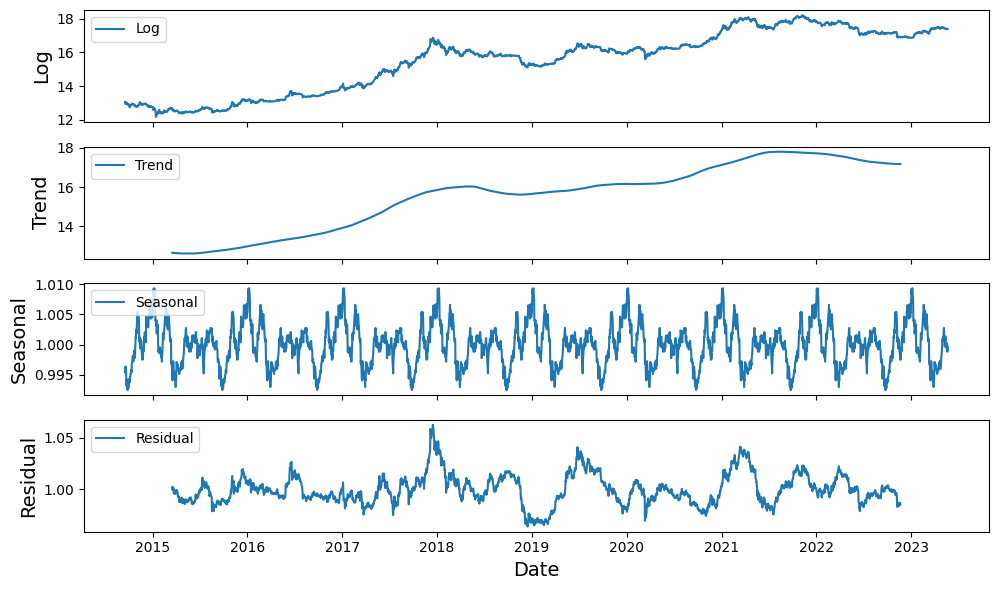

In [21]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

log_btc_krw_df = pd.DataFrame(np.log(btc_krw_df['Adj Close'])) # Original to Log Time Series

# 시계열 분해 수행
decomposition = sm.tsa.seasonal_decompose(log_btc_krw_df['Adj Close'], model='multiplicative', period=365)

# 서브플롯 설정
fig, axs = plt.subplots(4, 1, figsize=(10, 6), sharex=True)

# 원본 데이터
axs[0].plot(log_btc_krw_df.index, log_btc_krw_df['Adj Close'], label='Log')
axs[0].set_ylabel('Log', fontsize=14)
axs[0].legend(loc='upper left')

# 추세 구성 요소
axs[1].plot(log_btc_krw_df.index, decomposition.trend, label='Trend')
axs[1].set_ylabel('Trend', fontsize=14)
axs[1].legend(loc='upper left')

# 계절성 구성 요소
axs[2].plot(log_btc_krw_df.index, decomposition.seasonal, label='Seasonal')
axs[2].set_ylabel('Seasonal', fontsize=14)
axs[2].legend(loc='upper left')

# 잔차 구성(불규칙) 요소
axs[3].plot(log_btc_krw_df.index, decomposition.resid, label='Residual')
axs[3].set_xlabel('Date', fontsize=14)
axs[3].set_ylabel('Residual', fontsize=14)
axs[3].legend(loc='upper left')

# # x 축 범위 설정 (축소)
# xmin = pd.to_datetime('2022-05-20')
# xmax = btc_krw_df.index[-1]
# for ax in axs:
#     ax.set_xlim(xmin, xmax)

plt.tight_layout()
plt.show()

- 위 요소분해 분석의 주기성은 1년으로 설정하였습니다.
- **Log(원본;로그):** 윈계열에 비해 변동성 완화
- **Trend(추세성분):** 비선형적으로 증가
- **Seasonal(계절성분):** 설정된 주기(1년)에 따른 패턴 확인
- **Residual(잔차성분;불규칙):** 추세, 계절 성분을 뺀 불규칙 변동 패턴.

#### 2.2.2 장단기 주기 확인(Trend & Seasonal)

앞서 요소분해분석을 통해 원계열 데이터에 대해 로그, 추세, 계절, 잔차를 알아보았습니다. 이제 원계열 데이터에 대해 장단기 주기성을 확인하기 위해 위 데이터 수집과정 외부요인 데이터과 같이 확인해 보았던 전체 기간에 대한 선형회귀추세선(장기), 로그함수추세선과 월별 주기패턴(단기)을 확인해보겠습니다.

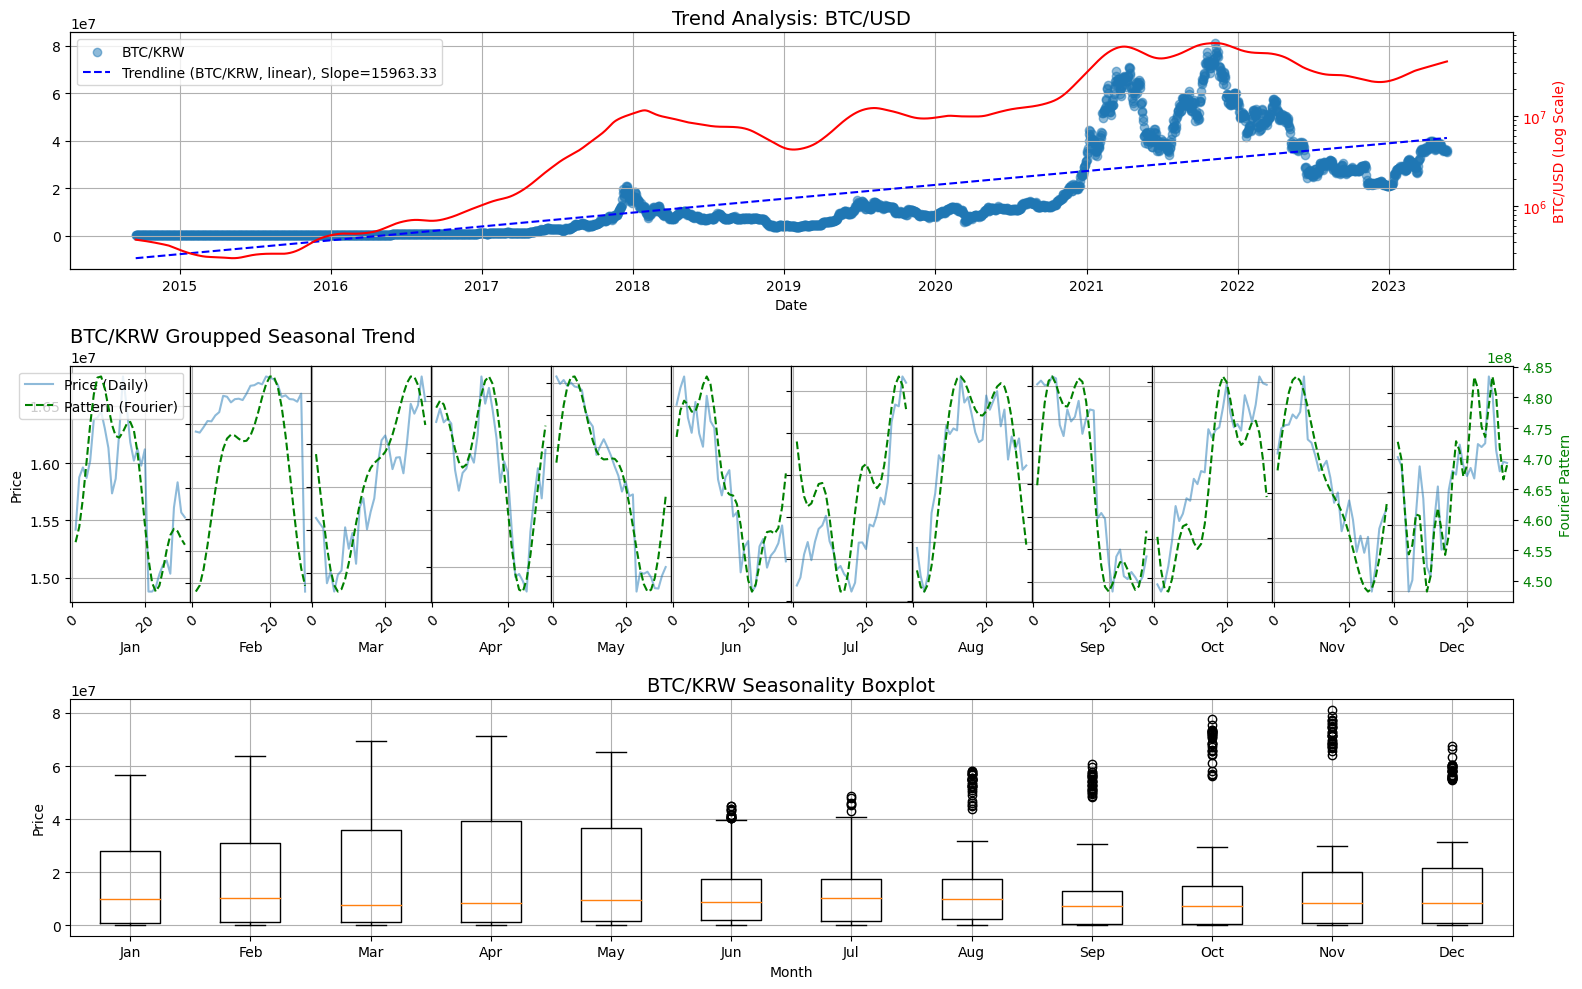

In [286]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.fft import fft, fftfreq

# 서브플롯 설정
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 12)

# BTC/KRW 추세 시각화
ax0 = fig.add_subplot(gs[0, :])
ax0.scatter(btc_krw_df.index, btc_krw_df['Adj Close'], label='BTC/KRW', alpha=0.5)

# log 함수를 적용한 추세선 계산
log_prices = np.log(btc_krw_df['Adj Close'])
lowess_smoothed = lowess(log_prices, btc_krw_df.index, frac=0.05)

# 별도의 y축을 가지는 로그 스케일 추세선 계산
ax0_new = ax0.twinx()
ax0_new.plot(btc_krw_df.index, np.exp(lowess_smoothed[:, 1]), color='red', label='Trendline (BTC/KRW, lowess-log)')
ax0_new.set_yscale('log')
ax0_new.set_ylabel('BTC/USD (Log Scale)', color='red')
ax0_new.tick_params(axis='y', labelcolor='red')

# 선형 회귀 추세선 계산
x = np.arange(len(btc_krw_df)).reshape(-1, 1)
y = btc_krw_df['Adj Close']
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
slope = model.coef_[0]

# 주 축에 대한 선형 회귀 추세선
ax0.plot(btc_krw_df.index, y_pred, color='blue', linestyle='dashed', label=f'Trendline (BTC/KRW, linear), Slope={slope:.2f}')

ax0.set_xlabel('Date')
ax0.set_title('Trend Analysis: BTC/USD', fontsize=14)
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # x 축의 날짜 형식 지정
ax0.xaxis.set_major_locator(mdates.YearLocator(1))
ax0.legend(loc='upper left')
ax0.grid(True)

# BTC/KRW 연간, 월간, 일간 데이터 그룹화
btc_krw_df['Year'] = btc_krw_df.index.year
btc_krw_df['Month'] = btc_krw_df.index.month
btc_krw_df['Day'] = btc_krw_df.index.day

grouped_btc_krw_d = btc_krw_df.groupby([btc_krw_df.index.month, btc_krw_df.index.day])['Adj Close']
grouped_btc_krw_m = btc_krw_df.groupby('Month')['Adj Close']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# BTC/KRW Groupped Seasonal Trend 시각화
for i, month in enumerate(range(1, 13)):
    ax = fig.add_subplot(gs[1, i])

    month_data_daily = daily_data_mean[daily_data_mean.index.get_level_values(0) == month]
    all_month_data_daily.append(month_data_daily)

    log_d = np.log(month_data_daily.values)
    line0 = ax.plot(month_data_daily.index.get_level_values(1), np.exp(log_d), label='Price (Daily)', alpha=0.5)

    ax.tick_params(axis='x', rotation=40)
    ax.set_xlabel(months[i])
    ax.grid(True)

    # Fourier 변환을 사용하여 일간 추세 패턴 계산
    fft_vals = fft(month_data_daily.values)
    fft_freq = fftfreq(len(month_data_daily))
    fft_amplitudes = np.abs(fft_vals)

    # 상위 주파수 성분을 추출하여 패턴으로 변환
    n_harmonics = 5  # 상위 주파수 성분의 개수
    top_harmonics = np.argsort(fft_amplitudes)[::-1][:n_harmonics]  # 주파수 성분의 인덱스
    trend_pattern = np.zeros_like(month_data_daily)
    for harmonic in top_harmonics:
        amplitude = fft_amplitudes[harmonic]
        phase = np.angle(fft_vals[harmonic])
        trend_pattern += amplitude * np.cos(2 * np.pi * fft_freq[harmonic] * np.arange(len(month_data_daily)) + phase)

    # 별도의 y축 추가: Fourier 변환 패턴
    ax_twin2 = ax.twinx()
    ax_twin2.set_ylabel('Fourier Pattern', color='green')
    line1 = ax_twin2.plot(month_data_daily.index.get_level_values(1), trend_pattern, color='green', linestyle='dashed', label='Pattern (Fourier)')
    ax_twin2.tick_params(axis='y', labelcolor='green')

    if i == 0:
        ax.set_title('BTC/KRW Groupped Seasonal Trend', loc='left', fontsize=14)
        ax.set_ylabel('Price')
        # 범례 항목 생성
        lines = line0 + line1
        labels = [line.get_label() for line in lines]
        # 하나의 범례로 통합하여 추가
        ax.legend(lines, labels, loc='upper right')
    if i != 0:
        ax.yaxis.set_ticklabels([])
    if i != 11:
        ax_twin2.yaxis.set_ticklabels([])

gs.update(wspace=0)

# BTC/KRW Groupped Seasonal 시각화
ax2 = fig.add_subplot(gs[2, :])
boxplot_data = [grouped_btc_krw_m.get_group(month) for month in grouped_btc_krw_m.groups.keys()]
ax2.boxplot(boxplot_data, labels=months)
ax2.set_xlabel('Month')
ax2.set_ylabel('Price')
ax2.set_title('BTC/KRW Seasonality Boxplot', fontsize=14)
ax2.grid(True)

plt.tight_layout()
plt.show()

1. 장기 추세(Trend Analysis: BTC/KRW)
- 파란색 산점도(Scatter)는 BTC/KRW 실제 가격 데이터를 표시합니다. 추세선을 따라 데이터의 경향을 파악할 수 있습니다.
- 빨간색 Trendline은 Linear Regression 모델을 사용하여 예측된 추세를 나타냅니다. 기울기(Slope)가 15966.77로 매우 강한 상승 강도를 보여줍니다. 이는 BTC/KRW 가격이 전반적으로 상승하고 있다는 것을 의미합니다.
- 빨간색 추세선은 변동성이 큰 시계열 데이터에 대한 추세 변환을 잘 보여주는 lowess(log) 함수 방법을 사용했습니다. 이 추세선은 로그 변환값을 가지는 별도의 y축(우측)을 사용하여 시각화되었습니다.

2. 월간 추세(Groupped Seasonal Trend)
- 파란색 선은 월간 일평균 가격을 로그 변환한 값으로, 월간 추세를 시각적으로 파악할 수 있습니다. 평균값이 해당 날짜의 가격을 대표하는 것은 아니지만, 월간 추세를 파악하기에 도움이 됩니다.
- 초록색 선은 푸리에 변환을 통해 추출된 상위 5개 주파수의 월간 추세를 보여줍니다. 이번 과정에서 푸리에 변환은 정규화가 아닌 단순히 추세의 상승, 하락 추세를 보다 쉽게 파악하기 위해 사용했습니다. 주의할 점은, 위 푸리에 변환 곡선은 단순히 월별 주기성(Seasonality Boxplot)과 비교하기 위한 시각화 자료이므로 개별 y축은 생략하였습니다.

3. 단기 주기(Seasonality Boxplot: BTC/KRW)
- 각 박스플롯은 BTC/KRW 가격의 월별 분포 패턴을 나타냅니다.
- 각 박스의 중앙선은 중앙값(mean)을 나타내며, 박스는 가격의 중간 50% 범위를 표시합니다. 박스의 위 아래 경계는 75%와 25% 사분위수를 나타냅니다.
- 박스 바깥의 선(whisker)은 최댓값과 최솟값을 의미합니다.
- 월별 사분위수와 최댓값은 4월이 가장 높고, 9월이 가장 낮은 것을 확인할 수 있습니다.
- 박스 바깥의 점은 이상치(outlier)를 의미합니다. 6월 부터 12월 사이에서 이상치들을 확인할 수 있는데, 이는 6월 부터 12월 사이에 일반적인 가격 동향과는 독립적으로 상당한 변동이 있음을 의미합니다. 이러한 이상치는 뉴스, 정책, 금융 시장의 불안정성 등의 외부요인에 의해 발생할 수 있습니다.
- 이러한 이상치나, 사분위수에 대한 특성은 장기추세 그래프와 비교했을 때, 보다 쉽게 확인할 수 있도록 도와줍니다.

### 2.3. 데이터 정상성 검정(통계적 가설 검정) 및 정상화(정규화) 처리

https://bluemumin.github.io/adp/2021/03/09/ADP-20%ED%9A%8C-ADP-%EC%8B%A4%EA%B8%B0-python-%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D(%EC%8B%9C%EA%B3%84%EC%97%B4-%EC%A0%95%EC%83%81%EC%84%B1-%EA%B2%80%EC%A6%9D)/


데이터의 정상성(Stationarity)은 시계열 데이터 분석에서 중요한 개념입니다. 정상성은 데이터가 시간에 따라 평균, 분산 및 자기상관과 같은 특성이 일정하게 유지되는 것을 의미합니다.

정상성을 가지는 시계열 데이터는 시간에 관계없이 일정한 통계적 특성을 지님으로, 시계열 데이터 분석에서 안정적인 예측모델을 구축하는데 필요합니다. 반대로, 정상성을 가지지 않는 데이터는 시간의 추세, 계절성, 변동성 등이 존재하므로 모델링과 예측이 어렵게 됩니다.


본 연구에서는 1)평균 일정성 검정, 2)분산 일정성 검정, 3)자기상관 일정성 검정을 모두 수행하고 검정 결과에 따라 데이터가 정상성을 지니도록 처리하는 과정을 수행합니다.

#### 2.3.1 평균 일정성 검정
- ADF(Augmented Dickey-Fuller) 검정을 활용해 시계열 데이터가 정상성을 가지는지 여부를 확인합니다.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 시계열 데이터 추출
btc_krw_series = btc_krw_df['Adj Close']

# ADF 검정 수행
adf_result = adfuller(btc_krw_series)

# 결과 출력
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'  {key}: {value}')

ADF Statistic: -1.5107243173104887
p-value: 0.5281996591889929
Critical Values:
  1%: -3.43243494922729
  5%: -2.8624612019435536
  10%: -2.5672603774676577


> ADF는 **귀무가설**(*`btc_krw_df[Adj Close]`는 단위근(비정상성)을 가진다.*)과 **대립가설**(*`btc_krw[Adj Close]`는 정상성을 가진다.*)을 가지고 이루어집니다.
> - **귀무가설:** 원계열은 안정적이지 않다(p-value > 0.05).
> - **대립가설:** 원계열은 안정적이다(p-value < 0.05).

- `p-value`가 `0.5281996591889929`로 유의수준 `0.05`보다 크기 때문에 <u>귀무가설을 기각할 수 없습니다.</u> 즉, `btc_krw_df[Adj Close]`는 단위근(비정상성)을 가집니다.
- `ADF Statistic`가 `-1.5107243173104887`이므로 임계값보다 크거나 작지 않으므로(절대값이 임계값보다 작지 않으므로) <u>귀무가설을 기각할 수 없습니다.</u>

> ***따라서, 시계열 데이터 `btc_krw_df['Adj Close']`는 정상성을 가지지 않는 시계열 데이터라고 할 수 있습니다.***

#### 2.3.2 분산 일정성 검정

- 이동평균(Moving Average) 그래프를 통해 데이터의 분산이 시간에 따라 일정한지를 확인합니다.
- 지수이동평균(Exponential Moving Average) 그래프(단기)를 통해 최근 데이터에 더 가중치를 부여한 평균선을 확인할 수 있습니다.
- 변동성(Velatility) 그래프를 통해 시간에 따른 데이터의 분산 정도(표준편차)를 확인합니다.
- LM(Lagrage Multiplier)(ARCH(Autoregressive Conditional Heteroscedasticity)모형에서 사용되는 검정 방법 중 하나로, 변동성의 일정성을 검증하는데 활용됨)검정을 통해 변동성의 일정성을 확인합니다.

C:\Users\creat\AppData\Local\Temp\ipykernel_20836\3056411745.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0, 0])


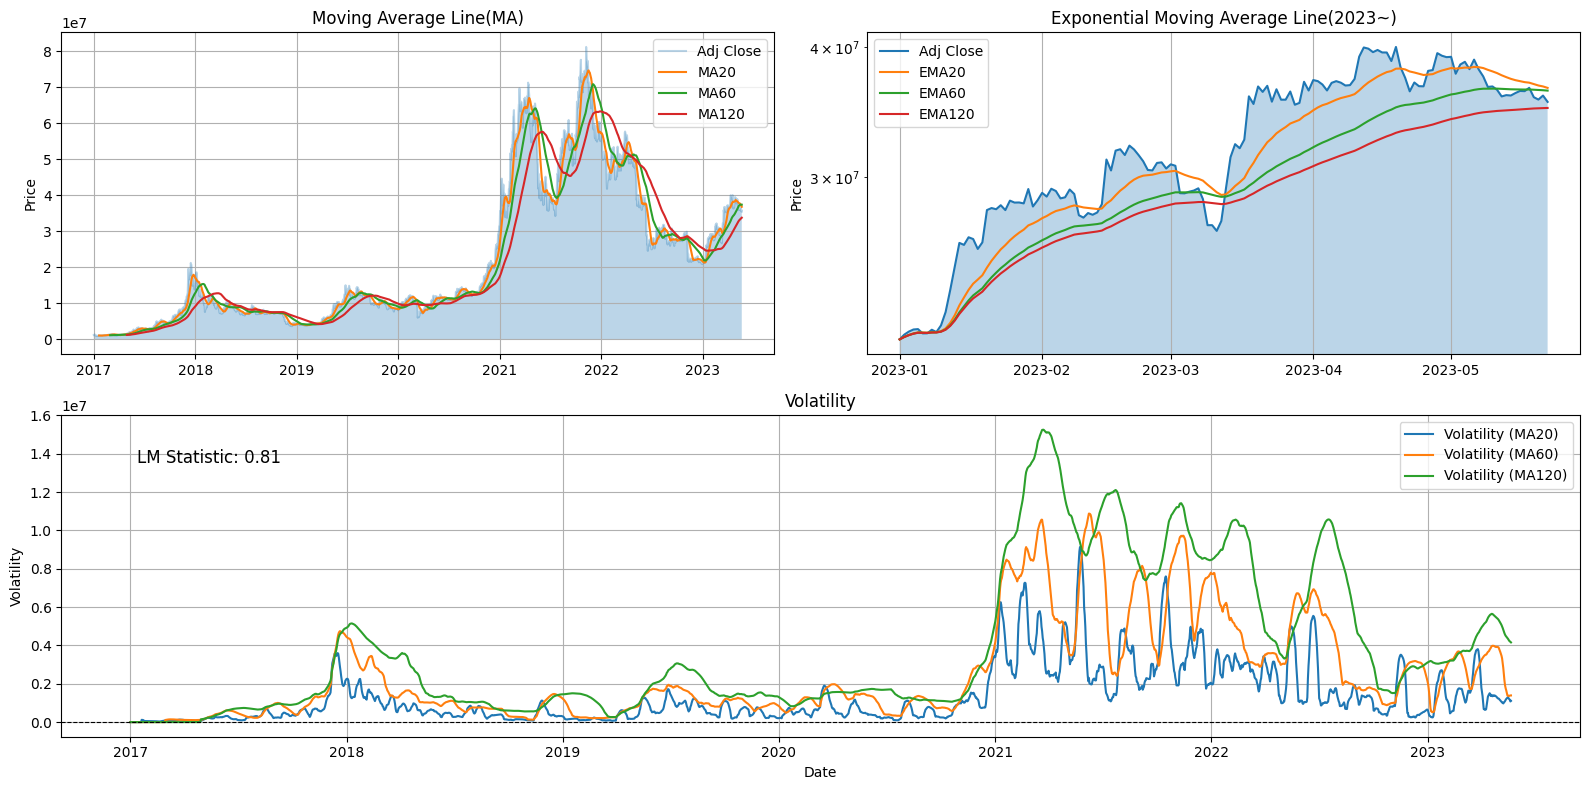

In [295]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import statsmodels.api as sm

# 그래프 생성
fig = plt.subplots(figsize=(16, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 3])


# 첫 번째 subplot: 이동평균선
ax1 = plt.subplot(gs[0, 0])
ax1.plot(btc_krw_df['Adj Close'].loc['2017':], label='Adj Close', alpha=0.3)
ax1.plot(btc_krw_df['Adj Close'].loc['2017':].rolling(20).mean(), label='MA20')
ax1.plot(btc_krw_df['Adj Close'].loc['2017':].rolling(60).mean(), label='MA60')
ax1.plot(btc_krw_df['Adj Close'].loc['2017':].rolling(120).mean(), label='MA120')
ax1.fill_between(btc_krw_df.index[btc_krw_df.index >= '2017'], btc_krw_df['Adj Close'].loc['2017':], alpha=0.3)
ax1.set_ylabel('Price')
ax1.set_title('Moving Average Line(MA)')
ax1.legend()
ax1.grid(True)

# 두 번째 subplot: 지수이동평균선
ax2 = plt.subplot(gs[0, 1])
ax2.plot(btc_krw_df['Adj Close'].loc['2023':], label='Adj Close')
ax2.plot(btc_krw_df['Adj Close'].loc['2023':].ewm(span=20).mean(), label='EMA20')
ax2.plot(btc_krw_df['Adj Close'].loc['2023':].ewm(span=60).mean(), label='EMA60')
ax2.plot(btc_krw_df['Adj Close'].loc['2023':].ewm(span=120).mean(), label='EMA120')
ax2.fill_between(btc_krw_df.index[btc_krw_df.index >= '2023'], btc_krw_df['Adj Close'].loc['2023':], alpha=0.3)
ax2.set_ylabel('Price')
ax2.set_yscale('log')
ax2.set_title('Exponential Moving Average Line(2023~)')
ax2.legend()
ax2.grid(True)

# 세 번째 subplot: 변동성
# 변동성 그래프에 발생할 수 있는 무한대 또는 결측 처리
volatility_ma20 = btc_krw_df['Adj Close'].loc['2017':].rolling(20).std().replace([np.inf, -np.inf], np.nan).fillna(0)
volatility_ma60 = btc_krw_df['Adj Close'].loc['2017':].rolling(60).std().replace([np.inf, -np.inf], np.nan).fillna(0)
volatility_ma120 = btc_krw_df['Adj Close'].loc['2017':].rolling(120).std().replace([np.inf, -np.inf], np.nan).fillna(0)

ax3 = plt.subplot(gs[1, :])
ax3.plot(volatility_ma20, label='Volatility (MA20)')
ax3.plot(volatility_ma60, label='Volatility (MA60)')
ax3.plot(volatility_ma120, label='Volatility (MA120)')
ax3.set_xlabel('Date')
ax3.set_ylabel('Volatility')
ax3.set_title('Volatility')
ax3.legend()
ax3.grid(True)

# LM 검정 통계량 계산
y = np.array(btc_krw_df['Adj Close'].loc['2017':])
X = sm.add_constant(np.column_stack((volatility_ma20, volatility_ma60, volatility_ma120)))
model = sm.OLS(y, X)
results = model.fit()
lm_statistic = results.rsquared

# LM 검정 통계량 출력
ax3.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax3.annotate(f"LM Statistic: {lm_statistic:.2f}", xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)

# 그래프 출력
plt.tight_layout()
plt.show()

1. 이동평균선(Moving Average Line)
- 각 이동평균선은 20일(MA20), 60일(MA60) 120일(MA120)에 대한 종가(Adj Close) 이동평균을 나타냅니다.
- 위 각 이동평균선은 해당 기간에 대한 장기적인 추세를 부드럽게 표현되어, 상향, 하향 추세를 쉽게 파악할 수 있습니다.

2. 지수이동평균선(Exponential Moving Average Line)
- 지수이동평균선은 BTC/KRW의 종가에 대한 지수이동평균선(Exponential Moving Average Line)을 나타냅니다.
- 파란색 선은 실제 가격 데이터를 나타내고, 녹색 선은 20일 지수이동평균선(EMA20), 주황색 선은 60일 지수이동평균선(EMA60), 보라색 선은 120일 지수이동평균선(EMA120)을 나타냅니다.
- 지수이동평균선은 최근 가격에 더 많은 가중치를 주어 최신 추세를 빠르게 파악할 수 있습니다.
- 가격의 상대적인 변동을 더 잘 확인할 수 있도록 y축을 로그 스케일로 표시하였습니다.

3. 변동성(Volatility)
- 변동성은 이동평균선을 통해 계산되었으며, 주황색 선은 20일 변동성(MA20), 녹색 선은 60일 변동성(MA60), 보라색 선은 120일 변동성(MA120)을 나타냅니다.
- 변동성은 가격의 변동 정도를 측정하는 지표로, 위 그래프의 경우 값이 커질수록 가격의 변동이 크다는 것을 나타내고 있습니다.
- LM 검정통계량은 잔차를 이용하여 계산된 LM(Lagrange Multiplier) 검정을 통해 추세 회귀 모형의 적합도를 측정하는 값으로, 0.81로 계산되었습니다.
- 검정통계량이 0에 가까울수록 추세 회귀 모형이 데이터에 잘 적합되었다고 해석됩니다(모형이 데이터의 변동성을 잘 설명하고 있음). 위 변동성의 LM 검정통계량은 추세 회귀 모형(독립변수: 변동성, 종속변수: 가격)이 상당히 잘 적합되었음을 알 수 있습니다.

##### 볼린저밴드
데이터의 변동성을 더 자세히 평가하고 추세 전환을 감지하기 위해, 주가 분석에 사용되는 볼린저밴드를 확인해 볼 수 있습니다. 볼린저밴드는 주가와 같은 시계열 데이터의 변동성과 가격 흐름을 분석하는데 효과적인 기술적 분석도구 입니다.
- 볼린저 추종매매, 반전 매매 참고: https://lifenlight.tistory.com/72

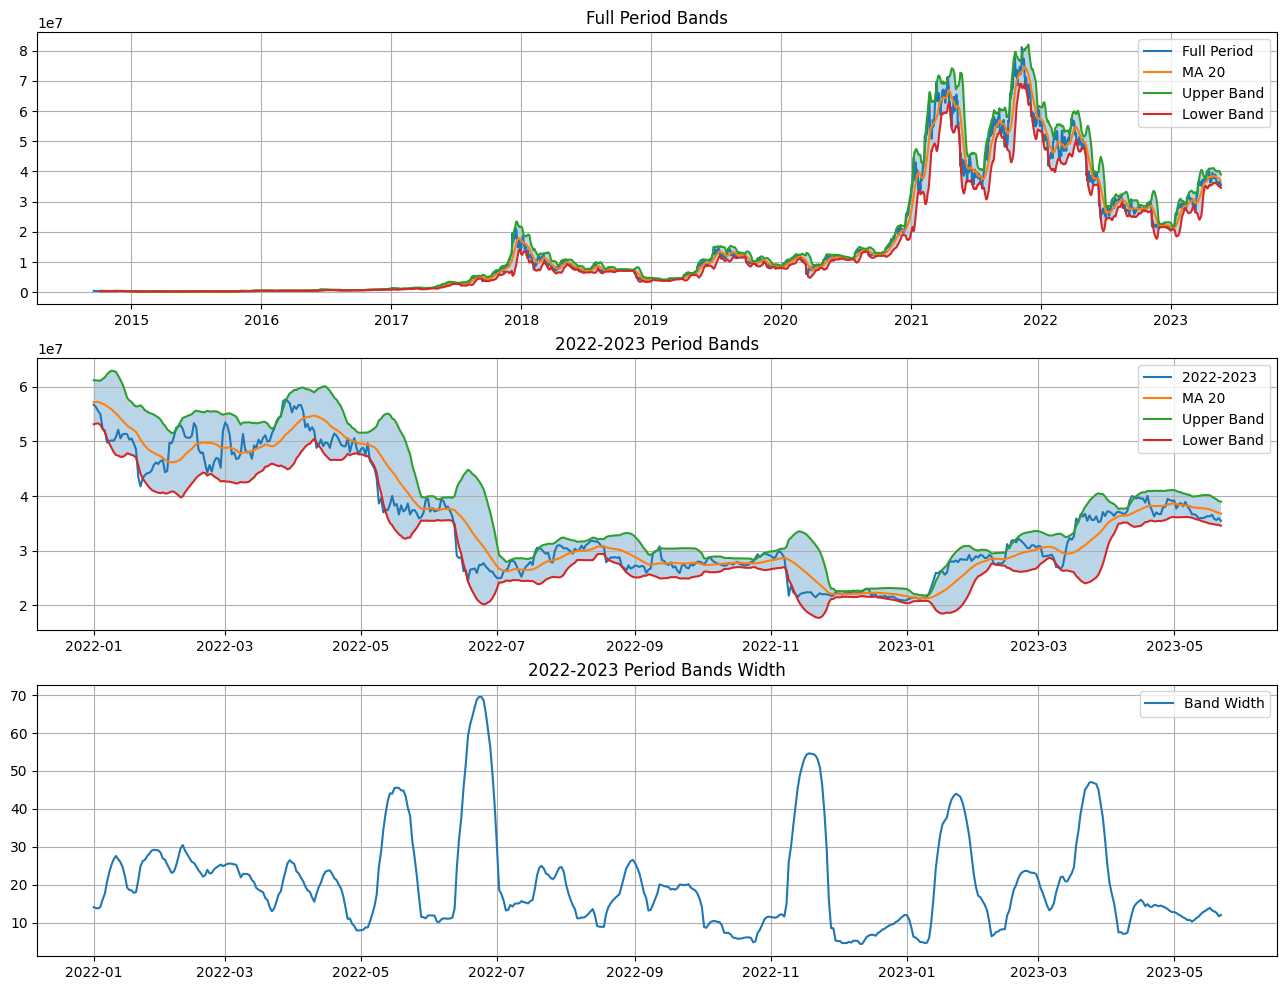

In [20]:
import matplotlib.pyplot as plt

# 이동평균 계산
moving_average = btc_krw_df['Adj Close'].rolling(window=20).mean()

# 이동평균의 표준편차 계산
std_dev = btc_krw_df['Adj Close'].rolling(window=20).std()

# 상단 밴드, 중간 밴드, 하단 밴드 계산
upper_band = moving_average + (2 * std_dev)
lower_band = moving_average - (2 * std_dev)

# 그래프 생성
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(16, 12), sharex=False)

# 전체 기간 데이터 플로팅
axs[0].set_title('Full Period Bands')
axs[0].plot(btc_krw_df.index, btc_krw_df['Adj Close'], label='Full Period')
axs[0].plot(moving_average.index, moving_average, label="MA 20")
axs[0].plot(upper_band.index, upper_band, label="Upper Band")
axs[0].plot(lower_band.index, lower_band, label="Lower Band")
axs[0].fill_between(btc_krw_df.index, lower_band, upper_band, alpha=0.3)
axs[0].legend()
axs[0].grid(True)

# 축소된 기간 데이터 플로팅
axs[1].set_title('2022-2023 Period Bands')
axs[1].plot(btc_krw_df.loc['2022':'2023'].index, btc_krw_df.loc['2022':'2023', 'Adj Close'], label='2022-2023')
axs[1].plot(moving_average.loc['2022':'2023'].index, moving_average.loc['2022':'2023'], label="MA 20")
axs[1].plot(upper_band.loc['2022':'2023'].index, upper_band.loc['2022':'2023'], label="Upper Band")
axs[1].plot(lower_band.loc['2022':'2023'].index, lower_band.loc['2022':'2023'], label="Lower Band")
axs[1].fill_between(btc_krw_df.loc['2022':'2023'].index, lower_band.loc['2022':'2023'], upper_band.loc['2022':'2023'], alpha=0.3)
axs[1].legend()
axs[1].grid(True)

# 축소된 기간 BandWidth 플로팅
axs[2].set_title('2022-2023 Period Bands Width')
axs[2].plot(btc_krw_df.loc['2022':'2023'].index, ((upper_band.loc['2022':'2023'] - lower_band.loc['2022':'2023']) / moving_average.loc['2022':'2023'] * 100), label='Band Width')
axs[2].legend()
axs[2].grid(True)

# 그래프 출력
plt.show()

볼린저밴드는 데이터의 상대적인 높낮이와 변동성을 시각화하여 추세 전환 및 반전 신호를 탐지하는데 도움을 줍니다. 일반적으로 주가 데이터가 상단 밴드를 돌파하면 과매수 상태, 하단 밴드를 돌파하면 과매도 상태로 간주됩니다.

볼린저 밴드는 시장의 변동성이 높을수록 밴드의 폭이 넓어지고, 변동성이 낮을수록 밴드의 폭이 좁아집니다. 이는 추세와 변동성의 관계를 파악하는데 도움을 줍니다.

#### 2.3.3 자기상관 일정성 검정

자기상관은 시계열 데이터의 자기자신과 다른 시점 간의 상관관계를 의미합니다. 시차(lag)를 적용하여 각 시점과 그 이전 시점의 데이터 간의 상관관계를 계산합니다. 일반적으로 t 시점의 데이터와 t-1 시점의 데이터 간의 상관관계를 의미합니다.

ACF와 PACF는 일반적으로 ARIMA(AutoRegressive Integrated Moving Average) 모델의 파라미터 결정에 활용되지만, 본 프로젝트에서는 데이터 탐색(Exploratory Data Analysis, EDA)에 활용합니다.

> - **ACF(Autocorrelation Function; 자기상관 함수)**: ACF는 시계열 데이터의 시차에 따른 자기상관을 나타내는 함수입니다. ACF는 시차(lag)가 증가함에 따라 상관관계가 어떻게 변하는지를 보여줍니다. ACF는 정상(Stationary) 시계열 데이터에서 시차가 커질수록 0에 가까워지는 경향을 보입니다. 비정상(Non-stationary) 시계열 데이터의 ACF는 천천히 감소하거나 큰 값이 지속되는 경우가 있습니다. ACF를 통해 시계열 데이터의 주기성이나 추세성을 확인할 수 있습니다.
> - **PACF(Partial Autocorrelation Function; 부분 자기상관 함수)**: PACF는 시차가 다른 두 시계열 데이터 간의 순수한 상호 연관성을 나타냅니다. 즉, 현재 시점과 특정 시차의 시계열 데이터 간의 연관성을 측정하고자 할 때, 이전 시차의 영향을 제거한 상관계수입니다. PACF는 특정 시차 간의 순수한 상관성을 확인할 수 있으며, 다른 시차의 영향력은 제외됩니다. 일반적으로 PACF는 시차가 증가함에 따라 0으로 수렴하는 경향을 보입니다.

- y 축은 각각 ACF, PACF를 수치화 한 것입니다.
- x 축 시차(Lag)는 몇 개 전의 값에 대한 것인지를 의미합니다.

ACF와 PACF를 통해 시계열 데이터의 자기상관성을 시각화하고 분석함으로써, 시계열 데이터의 패턴과 특성을 파악할 수 있습니다. 자기상관 함수를 통해 시차에 따른 데이터 간의 상관관계를 확인하고, PACF를 통해 특정 시차의 영향력을 독립적으로 분석할 수 있습니다. 이를 통해 시계열 데이터의 자기상관 일정성을 검정하고, 예측 모델링이나 시계열 분석에 활용할 수 있습니다.

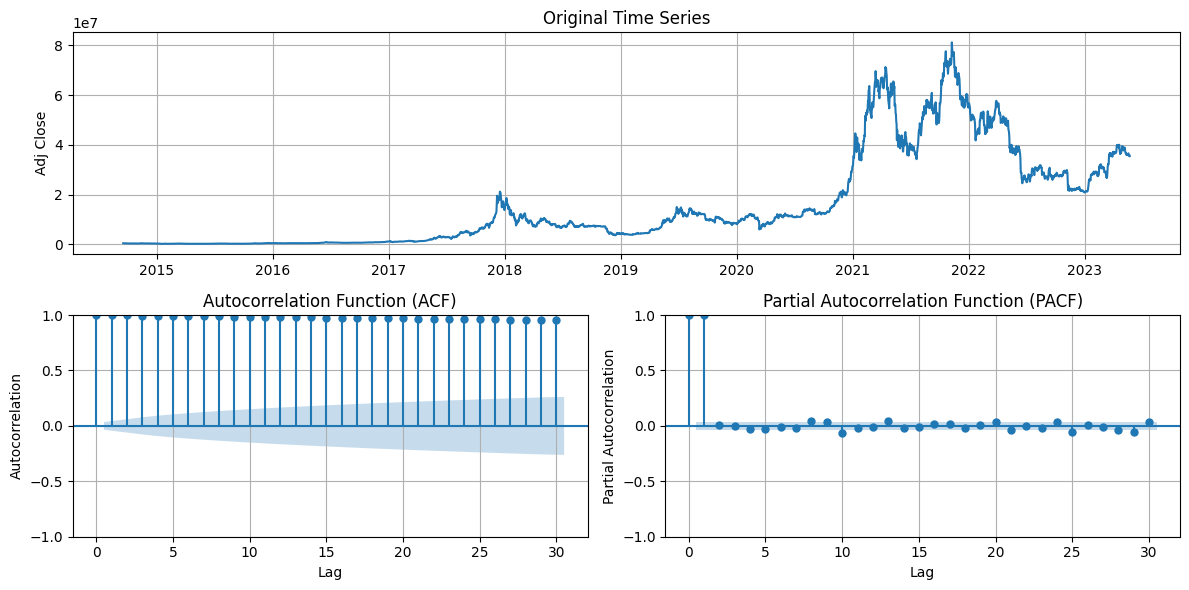

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 시각화
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 3])

# 원본 시계열 데이터 플로팅
ax1 = plt.subplot(gs[0, :])
ax1.plot(btc_krw_df['Adj Close'])
ax1.set_ylabel('Adj Close')
ax1.set_title('Original Time Series')
ax1.grid(True)

# ACF 플롯
ax2 = plt.subplot(gs[1, 0])
plot_acf(btc_krw_df['Adj Close'], ax=ax2, lags=30)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Autocorrelation')
ax2.set_title('Autocorrelation Function (ACF)')
ax2.grid(True)

# PACF 플롯
ax3 = plt.subplot(gs[1, 1])
plot_pacf(btc_krw_df['Adj Close'], ax=ax3, lags=30)
ax3.set_xlabel('Lag')
ax3.set_ylabel('Partial Autocorrelation')
ax3.set_title('Partial Autocorrelation Function (PACF)')
ax3.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()

- 원본 그래프(`btc_krw_series`)를 확인해보면 시간이 지남에 따라 값이 증가하는 추세를 보이지만, 변동성이 크다는 것을 확인할 수 있습니다.

1. ACF(자기상관함수; Autocorrelation Coefficient)
- ACF 그래프를 보면 ***매우 천천히*** correlation이 내려가고 신뢰구간 안에 들어가지 못하는 모습(모두 유의미하지 않음)을 보이고 있습니다. 즉, 원계열은 안정적이지 않습니다.
- 안정적인 시계열 데이터의 ACF 그래프는 일반적으로 처음에는 높은 상관성을 가지며 점차적으로 감소하며, 특정한 시차에서는 신뢰구간 안에 포함됩니다. 하지만 주어진 그래프에서는 천천히 감소하면서 신뢰구간에 포함되지 않으므로, 위 시계열 데이터는 안정적이지 않은 것으로 해석됩니다.

2. PACF(부분자기상관함수; Partial Autocorrelation Coefficient)
- PACF는 특정 시차(lag)에 대한 자기회귀 계수(Autocorrelation Coefficient)를 나타냅니다. 편자기상관도가 1부터 시작(유의)해 급격히 줄어들어 0에 가까운 값을 나타내며 유의하지 않은 상관을 나타내고 있습니다. 이러한 패턴은 자기회귀 항의 차수를 나타냅니다.
- 이러한 패턴은 일반적으로 자기회귀 모형(AR 모형)의 PACF 그래프에 나타나는 형태입니다. 이러한 그래프는 "cut-off" 또는 "truncated" 그래프라고도 불립니다.
- 이는 자기회귀 모형의 차수를 나타내며, 모형의 차수는 PACF 그래프에서 유의한 값을 갖는 최대 시차를 나타냅니다. 따라서, PACF 그래프의 급격한 감소와 0에 가까운 값을 가지는 시차 이후로는 자기회귀 항이 유의하지 않은 것으로 해석할 수 있습니다.

#### 2.3.4. 데이터 정상화(Data Stationarization)

데이터 정상화(Data Stationarization)는 시계열 데이터를 정상성을 가지는 형태로 변환합니다. 정상성은 시계열 데이터의 평균과 분산이 시간에 따라 일정한 상태를 의미하며, 정상성을 가지는 데이터는 예측 및 분석에 용이합니다. 데이터 정상화는 시계열 데이터의 불규칙한 패턴을 분석하기 쉽게 만들어줍니다. 원본 데이터에 대해 로그 변환 후 차분을 수행하는 것은 데이터 정상화의 일반적인 방법 중 하나이지만, 원계열에 대한 상관도를 대폭 상실할 수도 있기 때문에 박스-콕스(Box-Cox) 변환 후 1차 차분으로 정상화를 수행합니다.

- 시계열 데이터 분석을 위한 근사적 정상화(Approximate Stationarization): 원본 데이터에 대해 박스-콕스(Box-Cox) 변환 후 1차 차분 수행
- 다변량 시계열 예측 개선을 위한 약정상화(Weakly Stationarization): 원본 데이터에 대해 분위수 정규화(Quantile Normalization)

##### 1. 근사적 정상화 수행 결과 확인

ADF Statistic: -16.78799712559445
p-value: 1.2486527660954891e-29
Critical Values:
  1%: -3.432421738419329
  5%: -2.862455366986349
  10%: -2.567257271036861


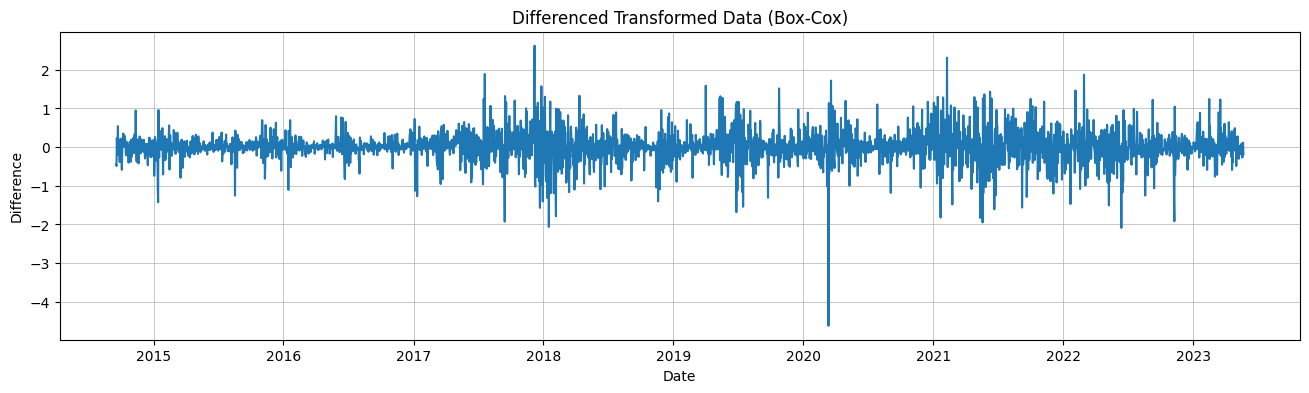

In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import boxcox

# 박스-콕스 변환 수행
transformed_data, lambda_value = boxcox(btc_krw_df['Adj Close'])

# 변환된 데이터를 DataFrame으로 변환
transformed_df = pd.DataFrame(transformed_data, columns=['Adj Close'], index=btc_krw_df.index)
transformed_df['Lambda'] = lambda_value

# 1차 차분
diff_transformed_df = transformed_df['Adj Close'].diff(1)
diff_transformed_df.dropna(inplace=True)

# 시계열 데이터 추출
trfd_btc_krw_series = diff_transformed_df.values

# ADF 검정 수행
adf_result = adfuller(diff_transformed_df)

# 결과 출력
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'  {key}: {value}')

# diff_transformed_df['Adj Close'] 표시
plt.figure(figsize=(16,4))
plt.plot(diff_transformed_df.index, diff_transformed_df)
plt.title('Differenced Transformed Data (Box-Cox)')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.grid(True, linewidth=0.5)
plt.show()

- 근사적 정상화의 ADF 검정 결과를 보면, ADF 통계량은 -16.7879이고, p-value는 1.2489e-29입니다. 이는 매우 작은 p-value이므로 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 따라서, 데이터는 1% 유의수준에서도 정상성을 충족합니다.

- ADF 통계량이 임계값(Critical)보다 더 낮으므로, 귀무가설을 기각할 수 있고 시계열 데이터가 정상성을 가진 것으로 판단할 수 있습니다.

- 따라서, 주어진 데이터는 정상성을 충족하므로 정상화된 데이터를 사용하여 모델을 생성하고 예측을 수행할 수 있습니다.

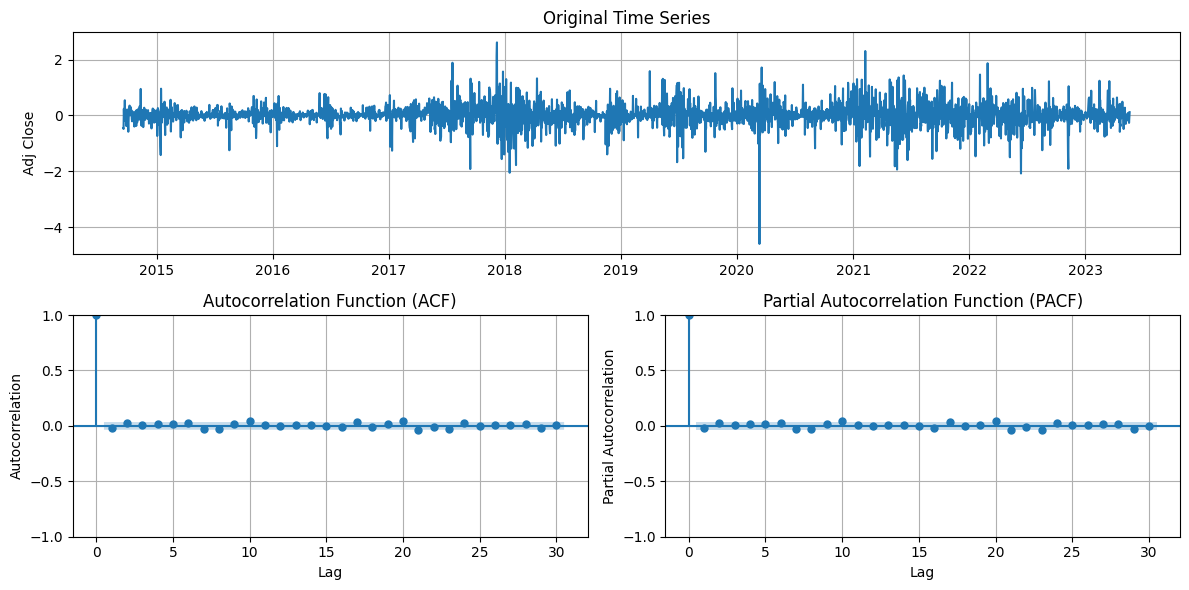

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 시각화
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 3])

# 원본 시계열 데이터 플로팅
ax1 = plt.subplot(gs[0, :])
ax1.plot(diff_transformed_df)
ax1.set_ylabel('Adj Close')
ax1.set_title('Original Time Series')
ax1.grid(True)

# ACF 플롯
ax2 = plt.subplot(gs[1, 0])
plot_acf(diff_transformed_df, ax=ax2, lags=30)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Autocorrelation')
ax2.set_title('Autocorrelation Function (ACF)')
ax2.grid(True)

# PACF 플롯
ax3 = plt.subplot(gs[1, 1])
plot_pacf(diff_transformed_df, ax=ax3, lags=30)
ax3.set_xlabel('Lag')
ax3.set_ylabel('Partial Autocorrelation')
ax3.set_title('Partial Autocorrelation Function (PACF)')
ax3.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()

1. ACF
- ACF 그래프가 Lag 0 이후에 급격히 감소하고, 신뢰구간 안에서 0 주변에 머무르는 결과는 정상화된 시계열 데이터를 의미합니다.
- 이는 현재 관측치와 그 이전의 관측치 사이에는 상관성이 거의 없음을 의미합니다. 이는 시계열 데이터의 과거 관측치들이 현재 관측치에 대한 정보를 거의 제공하지 않는다는 것을 나타냅니다.
- 따라서, 정상화된 시계열 데이터에서 현재 시점의 관측치가 이전 시점의 관측치에 의존하지 않고, 독립적으로 변동한다는 것을 의미합니다.

2. PACF
- PACF 그래프는 정상화 이전 PACF 그래프와 매우 유사하지만, 정상화 이전 PACF는 Lag 1이후에 신뢰구간 안으로 들어오는 반면 정상화 이후 PACF는 Lag 0이후에 신뢰구간안으로 들어온다는 차이가 있습니다.
- Lag 0 이후에 신뢰구간 안으로 들어오는 것은 현재 관측치와 이전의 모든 관측치 간에는 직접적인 관련성이 없고, 오직 현재 관측치와 직전 관측치만이 강한 상관성을 가지고 있다는 것을 나타냅니다.
- 따라서, 정상화 이후 PACF 그래프의 특징은 현재 관측치와 직전 관측치 간의 상관성을 반영하며, 그 외의 과거 관측치들은 상관성이 없거나 약하다는 것을 나타내는데, 이는 시계열 데이터의 자기회귀 모델링과 예측에 유용한 정보를 제공할 수 있습니다.

##### 2. 다변량 시계열 예측 개선을 위한 약정상화(Weakly Stationarization) 수행 결과 확인

다변량 시계열 예측 개선을 위한 약정상화 방법에는 원계열 데이터에 대해 분위수 정규화 이후 추세 또는 주기성(계절성)을 제거하는 방법이 있습니다. 분위수 정규화 이후 추세를 제거하는 방법을 선택할 경우, 원계열 데이터의 장기적인 경향성을 제거하고 잔차에 관심을 둠으로써, 주로 시간에 따른 잔차의 패턴과 상관관계를 모델링하고 예측에 활용할 수 있습니다. 반면, 분위수 정규화 이후 주기성을 제거하는 방법은 장기적인 경향성을 제거, 이상치를 완화하여 단기적인 패턴에 관심을 둠으로써, 주로 계절성 패턴이 예측 모델링에 방해가 되는 경우 사용됩니다. 이 방법으로 모델이 계절성에 의해 발생하는 변동성을 잘 처리할 수 있습니다.

그러나 다변량 시계열 예측에서는 계절성 패턴이 다른 변수들과의 상관관계를 나타내는 중요한 정보일 수 있으며, 추세는 장기적인 의존성 문제를 유발할 수 있습니다. **따라서 계절성을 제거하면서 다른 변수와의 관계를 잃어버리는 문제가 발생할 수 있기 때문에, 분위수 정규화 + 추세 제거 방법이 다변량 시계열 예측 모델에 더 적합한 약정상화 방법일 가능성이 있습니다.**

본 프로젝트에서는 분위수 정규화 + 주기성 제거 방법 대신 분위수 정규화 + 추세 제거 방법으로 약정상화를 진행합니다. 한편, 분위수 정규화 + 주기성 제거 방법의 ADF 결과와 분위수 정규화 + 추세 제거 방법의 ADF 결과는 아래와 같습니다.

```python
# 분위수 정규화 + 주기성 제거 방법
ADF Statistic: -12.024191524789682
p-value: 2.975230554180101e-22
Critical Values:
  1%: -3.4324336205696255
  5%: -2.862460615102446
  10%: -2.567260065043355

# 분위수 정규화 + 추세 제거 방법
ADF Statistic: -10.062315097716665
p-value: 1.3235956207907157e-17
Critical Values:
  1%: -3.4324250254012925
  5%: -2.862456818784834
  10%: -2.567258043948983
```

이렇게 처리된 데이터는 추세가 제거된 데이터를 정규화된 형태에서 다시 복원한 값입니다. 이는 추세 제거를 통해 얻은 정규화된 데이터에 이동평균 값을 다시 더하여 원래의 데이터 스케일로 복원한 것 즉, **추세를 제거한 후의 정규화된 데이터를 원본 데이터의 스케일로 복원한 값**입니다.

ADF Statistic: -10.058077706233956
p-value: 1.3562730274569859e-17
Critical Values:
  1%: -3.4324243671707535
  5%: -2.862456528056838
  10%: -2.5672578891704614


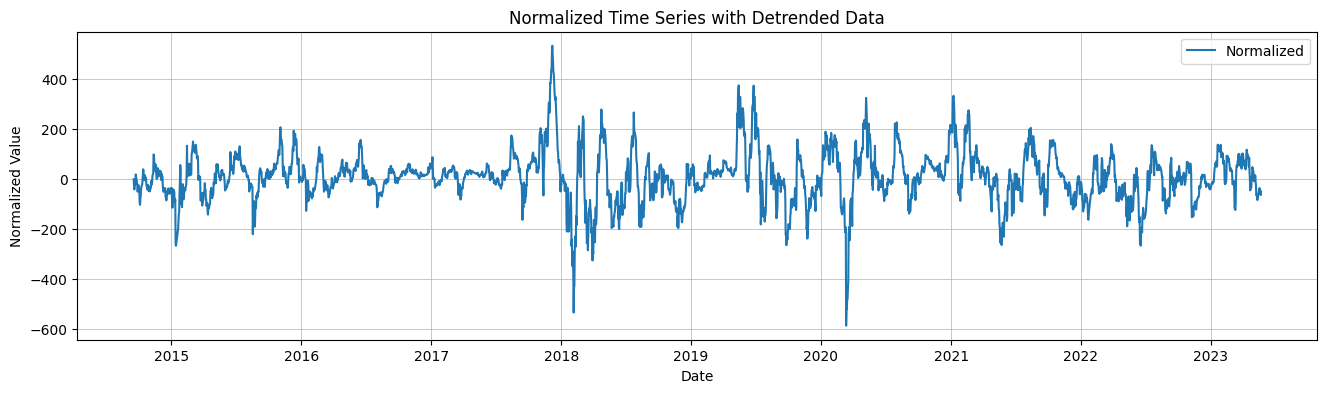

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import rankdata, norm

# 분위수 정규화 수행
normalized_data = rankdata(btc_krw_df['Adj Close']) / len(btc_krw_df)

# 추세 제거를 위한 이동평균 계산
window = 30  # 이동평균 윈도우 크기
rolling_mean = pd.Series(normalized_data).rolling(window=window, min_periods=1).mean()

# 추세 제거
detrended_data = normalized_data - rolling_mean

# 정규화된 데이터로 원계열 복원
restored_data = detrended_data * len(btc_krw_df)

# 시계열 데이터 추출
trfd_btc_krw_series = restored_data.values

# ADF 검정 수행
adf_result = adfuller(restored_data)

# 결과 출력
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'  {key}: {value}')

# 원본 데이터와 정규화된 데이터 플롯
plt.figure(figsize=(16,4))
plt.plot(btc_krw_df.index, restored_data, label='Normalized')
plt.title('Normalized Time Series with Detrended Data')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True, linewidth=0.5)
plt.show()

**ADF 검정 결과:** 분위수 정규화 + 추세 제거 방법의 ADF 검정 결과 ADF Statistic 값이 -10.062315097716665로, 유의수준 1%에서의 임계값인 -3.4324250254012925보다 작습니다. 이는 귀무가설을 기각하고 해당 시계열 데이터가 정상 시계열로 해석 가능하다는 것을 나타냅니다. 반면, 분위수 정규화 + 계절성 제거 방법의 ADF Statistic 값은 -12.024191524789682로, 이 또한 귀무가설을 기각하고 정상 시계열로 해석 가능함을 보여줍니다. 따라서 두 방법 모두 정상화를 수행할 수 있지만, ADF 검정 결과로는 두 방법이 유사한 정도의 성능을 나타냅니다.

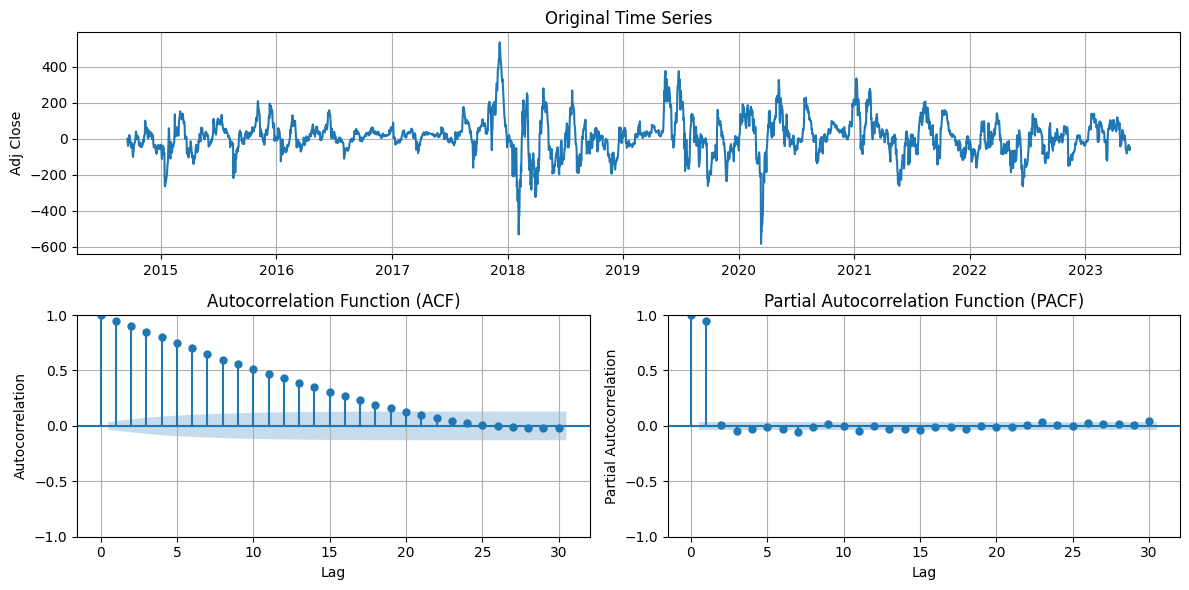

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 시각화
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 3])

# 원본 시계열 데이터 플로팅
ax1 = plt.subplot(gs[0, :])
ax1.plot(btc_krw_df.index, restored_data)
ax1.set_ylabel('Adj Close')
ax1.set_title('Original Time Series')
ax1.grid(True)

# ACF 플롯
ax2 = plt.subplot(gs[1, 0])
plot_acf(restored_data, ax=ax2, lags=30)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Autocorrelation')
ax2.set_title('Autocorrelation Function (ACF)')
ax2.grid(True)

# PACF 플롯
ax3 = plt.subplot(gs[1, 1])
plot_pacf(restored_data, ax=ax3, lags=30)
ax3.set_xlabel('Lag')
ax3.set_ylabel('Partial Autocorrelation')
ax3.set_title('Partial Autocorrelation Function (PACF)')
ax3.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()

약 정상화 이후 약한 자기 상관을 가지면서, 정상성을 지니게 되었습니다.
1. ACF
- ACF 그래프에서 시차가 증가함에 따라 자기상관도가 천천히 신뢰구간 안으로 들어오며, Lag 25부터는 0 또는 0 주변을 오가는 형태를 보여줍니다.
- 이는 이전 시차(Lag)에 대한 상관성이 점차 감소하고 있다는 것을 의미합니다. 즉, 현재 관측치와 그 이전의 일부 관측치들 사이의 상관성이 감소하고 있습니다.
- 즉, 시계열 데이터가 약간의 시차가 있는 상관성을 가지고 있지만, 이 시차가 점차 희석되고 있음을 나타냅니다

2. PACF
- PACF 그래프는 원계열 데이터와 유사하게 Lag 1 이후 0 주변을 머무르는 편자기상관도를 보여주지만, 원계열 데이터의 PACF와 다르게 Lag 1의 편자기상관도가 감소했음을 알 수 있습니다.

## [3. 모델 선택](###목차)
이제, 머신러닝과 딥러닝 모델을 사용해 BTC/KRW의 가격을 예측해보도록 하겠습니다. 이 단계에서는 다양한 모델을 검토하고 가장 적합한 모델을 선택해 예측을 수행합니다. 모델의 선택은 예측 성능, 데이터의 특성, 모델의 복잡도, 계산 속도 등을 고려합니다.

1. 단순 회귀예측 모델
2. 로지스틱 회귀예측 모델
3. 다항 회귀예측 모델(단순, 로지스틱)
4. 벡터 자동 회귀예측(VAR;Vector Auto Regression)
5. Convolutional LSTM(Conv1D, Conv2D)
6. 2차원 어텐션-기반 다중 입력 LSTM
7. Timesnet
8. TST(Time-Series Transformer): 스타일 기반 트랜스포머
9. 유전 알고리즘 신경망 예측 모델

### 1.단순 비선형 회귀 예측 모델(Support Vector Regression)
본 프로젝트의 주요 과제인 머신러닝과 딥러닝을 활용하기에 앞서 단순회귀모형으로 BTC/KRW의 가격을 예측해봅니다.

단순회귀분석모델은 종속변수와 한 개의 독립변수 간의 선형 관계를 모델링하는 간단한 방법으로, 과거의 가격 데이터를 독립변수로 사용합니다. 이 모델은 데이터 간의 선형 관계를 학습하고, 슬라이딩 윈도우로, 학습된 모델을 사용하여 새로운 인덱스에 대한 예측을 수행합니다(예를 들어, 과거 30일 간의 가격 데이터로 다음 날의 가격을 예측).

단순 회귀분석 모델의 장점은 구현이 간단하고 해석이 용이하다는 것입니다. 데이터의 선형성이 뚜렷한 경우에는 좋은 예측 성능을 발휘할 수 있으나 이는 변수 간의 선형 관계만을 고려하기 때문에, 데이터의 복잡한 패턴이나 이상치에 대한 예측을 반영하지 못할 수 있습니다.

- [단순 비선형 회귀 예측 모델(SVR)](./notebook/SimpleRegression.ipynb)

### 2.로지스틱 회귀 예측 모델
이진 분류 문제에 적용되는 통계적 모델 중 하나인 로지스틱 회귀분석 모델로 BTC/KRW 가격에 대해 상승 또는 하락을 예측하는 문제로 접근할 수 있습니다. 이는 선형 회귀 모델과 유사하게 독립 변수와 종속 변수 간의 관계를 모델링 하지만 종속 변수가 이진 형태인 경우, 선형 회귀 모델을 직접 적용할 수 없습니다. 따라서 로지스틱 회귀분석 모델은 종속 변수의 이진 형태를 설명하기 위해 로지스틱 함수를 사용하여 확률을 예측합니다.

로지스틱 회귀분석 모델은 주어진 학습 데이터를 기반으로 회귀 계수를 추정하고, 이를 활용하여 새로운 입력 데이터에 대한 가격 상승 확률을 예측합니다. 로지스틱 회귀분석 모델의 장점은 해석이 용이하고 예측 결과를 확률로 제공한다는 것입니다. 또한, 모델이 학습한 회귀 계수를 통해 독립 변수의 영향력을 파악할 수 있습니다. 다만, 독립 변수와 종속 변수 간의 선형 관계를 가정하고 있기 때문에, 비선형성을 잡아내지 못할 수 있습니다.

- [로지스틱 회귀 예측 모델](./notebook/LogisticReression.ipynb)

### 3.다항 회귀 예측 모델(단순, 로지스틱)
다항 회귀분석 모델은 선형 회귀분석 모델의 확장으로, 종속 변수와 독립 변수 간의 비선형 관계를 모델링하는데 사용됩니다. 이는 단항 회귀분석 모델과 마찬가지로 주어진 학습 데이터를 기반으로 회귀 계수를 추정하고, 이를 활용하여 새로운 입력 데이터에 대한 가격 예측을 수행합니다. 그러나 이 모델은 다항식의 차수를 조정하여 최적의 적합성을 찾을 수 있습니다. 일반적으로 모델의 복잡성과 과적합 사이의 trade-off를 고려해야 합니다.

다항 회귀분석 모델의 장점은 비선형 관계를 모델링할 수 있다는 점입니다. 이를 통해 BTC/KRW 가격의 다양한 비선형 패턴을 포착할 수 있습니다. 또한, 다항 회귀분석 모델은 선형 회귀분석 모델의 기본 가정을 그대로 유지하기 때문에 해석이 용이하고 설득력을 지닙니다.

### 4.벡터 자동 회귀예측(VAR;Vector Auto Regression)
벡터 자동 회귀분석(VAR)은 다변량 시계열 데이터를 분석하기 위한 통계적 모델링 방법 중 하나입니다. VAR 모델은 여러 개의 시계열 변수 간의 상호 의존 관계를 고려하여 시계열 데이터를 모델링합니다.

VAR 모델은 각 변수가 이전 시간 단계의 값들과 **선형** 관계를 가지며, 시간에 따른 상호 의존성을 나타냅니다. 이 모델은 자기회귀 모델의 확장으로 볼 수 있으며, 다변량 시계열 데이터에 대한 예측 및 인과 관계 분석에 유용하게 사용됩니다.

VAR 모델의 핵심은 변수 간의 회귀식을 행렬 형태로 표현하는 것입니다. 예를 들어, VAR(p) 모델은 p개의 시간 단계 이전의 값들을 사용하여 각 변수의 현재 값을 예측합니다. VAR(p) 모델은 다변량 자기회귀 모델로 간주되며, 각 변수의 자기회귀 계수를 추정하여 모델을 구성합니다.

### 5.Convolutional LSTM(Long Short-Term Memory)
RNN(Recurrent Neural Network)은 순차적인 데이터를 처리하는 데 사용되는 신경망 모델입니다. RNN은 순환 구조를 가지며, 이전 시간 단계의 입력과 현재의 입력을 함께 고려하여 다음 시간 단계의 출력을 예측합니다. 하지만 RNN은 장기 의존성 문제(long-term dependency problem)로 인해 시계열 데이터의 긴 패턴을 잘 파악하기 어렵다는 단점이 있습니다.

LSTM(Long Short-Term Memory)은 RNN의 한 종류로, RNN의 장기 의존성 문제를 해결하기 위해 고안되었습니다. LSTM은 기억셀(memory cell)이라는 구조를 도입하여 과거의 정보를 오랫동안 기억할 수 있게 합니다. 기억셀은 입력 게이트(input gate), 삭제 게이트(forget gate), 출력 게이트(output gate)라는 세 가지 게이트로 구성되어 있습니다. 입력 게이트는 현재 입력을 얼마나 반영할지를 결정하고, 삭제 게이트는 얼마나 과거 정보를 잊을지를 결정하며, 출력 게이트는 얼마나 기억된 정보를 다음 시간 단계로 전달할지를 결정합니다. 이러한 구조로 LSTM은 장기 의존성을 유지하면서도 필요한 정보를 선택적으로 사용할 수 있는 강력한 모델입니다.

이번 프로젝트에서 수행할 Convolutional LSTM은 LSTM에 CNN(합성곱 신경망; Convolutional Neural Network)의 아이디어를 결합한 모델입니다. 이번 프로젝트에서 수행하는 Convolutional LSTM에 대한 주요 개념은 아래와 같습니다.

- **시간적(장기) 의존성 모델링**: LSTM은 RNN의 한 종류로서, 시계열 데이터의 장기 의존성(추세)을 잘 모델링할 수 있습니다. 따라서 긴 시계열 데이터에서 발생하는 장기적인 패턴과 의존 관계를 파악하여 예측에 활용할 수 있습니다.
- **지역적(공간적) 패턴 인식**: CNN은 Conv1D 또는 Conv2D를 사용하여 지역적인 패턴을 인식하고 추출하는데 강점이 있습니다. 이를 시계열 데이터의 지역적인 패턴이나 이미지 데이터의 공간적인 패턴을 포착하여 예측에도 활용할 수 있습니다. 이는 시계열 데이터에서도 지역적인 패턴을 감지하고 추출할 수 있습니다. 예를 들어, BTC/KRW 데이터에서 주기성이나 특정 패턴을 가진 지역적 구조를 인식할 수 있습니다.
- **Conv1D**: 1차원 합성곱 연산을 통해 시계열 데이터의 지역적인 패턴을 감지합니다. 이를 통해 시계열 데이터의 시간적 특성을 모델링할 수 있습니다. 예를 들어, BTC/KRW 데이터에서 특정 구간 내의 가격 변동 패턴을 파악할 수 있습니다.
- **Conv2D**: 2차원 합성곱 연산을 통해 이미지 데이터의 지역적인 패턴을 감지합니다. 이미지의 픽셀 간 상관 관계를 고려하여 공간적인 특성을 모델링할 수 있습니다. Conv2D는 이미지 데이터에서 텍스처, 형태, 경계 등의 패턴을 인식하는 데에 주로 사용되는데, 이는 다변량 시계열 데이터의 예측 모델을 구축하는 데에도 적용할 수 있습니다. 다변량 시계열 데이터의 경우, 각 변수(특성)는 이미지의 채널과 유사한 개념으로 간주될 수 있습니다. 따라서 Conv2D를 활용하여 다변량 시계열 데이터의 공간적인 패턴을 인식하고 예측하는 모델을 구축할 수 있습니다.

### 6.2차원 어텐션-기반 다중 입력 LSTM
이 모델은 LSTM을 기반으로, 어텐션 메커니즘을 활용하여 다중 입력 데이터의 상관 관계를 모델링하고 예측합니다. 이 모델은 각 입력 시퀀스의 중요한 부분에 집중하고, 입력 데이터 간의 상관 관계를 동적으로 학습하여 예측 성능을 향상시킵니다.

어텐션 메커니즘은 입력 시퀀스 간의 가중치를 계산하여 각 입력 시퀀스의 중요도를 결정합니다. 이를 통해 모델이 예측에 가장 중요한 입력 정보에 집중하고, 더욱 정확한 예측을 수행할 수 있도록 합니다.

### 7.TimesNet
TimesNet은 시계열 데이터 분석을 위한 딥러닝 아키텍처 중 하나입니다. 이 모델은 CNN(Convolutional Neural Network)과 LSTM(Long Short-Term Memory)을 결합한 형태로, 시계열 데이터의 특징을 추출하고 예측을 수행합니다.

이는 Convolutional LSTM과 마찬가지로 CNN과 LSTM이 결합된 모델이지만 구체적인 모델 구현 방식이나, 네트워크 아키텍처의 세부사항에서 차이가 있습니다. 특히, TimesNet은 Embedding과 TimesBlock 등의 개념을 활용합니다.

**Embedding:** Embedding은 TimesNet에서 사용되는 첫 번째 레이어로, 범주형 변수나 텍스트 데이터와 같은 이산적인 데이터를 연속적인 공간으로 매핑하는 역할을 합니다. Embedding은 범주형 변수를 원-핫 인코딩 대신 저차원의 밀집 벡터로 표현함으로써 차원의 저주(curse of dimensionality) 문제를 완화하고, 변수 간의 유사성을 반영할 수 있습니다.

**TimesBlock:** TimesBlock은 TimesNet의 핵심 구성 요소로서, CNN과 LSTM을 결합하여 시계열 데이터의 특징 추출과 시간적인 의존성을 모델링합니다. TimesBlock은 일련의 CNN 레이어와 LSTM 레이어로 구성되며, CNN은 시계열 데이터의 지역적인 패턴을 인식하고, LSTM은 시계열 데이터의 시간적인 의존성을 학습합니다. TimesBlock은 시계열 데이터를 입력으로 받아 CNN과 LSTM을 번갈아가며 통과시키는 구조를 갖고 있습니다. 이를 통해 TimesNet은 시계열 데이터의 다양한 시간 스케일의 특징을 캡처하고, 긴 기간의 의존성을 모델링할 수 있습니다.

TimesNet은 Embedding을 통해 범주형 데이터를 처리하고, TimesBlock을 통해 CNN과 LSTM을 결합하여 시계열 데이터의 특징 추출과 의존성 모델링을 수행하는 특화된 아키텍처라고 할 수 있습니다.

### 8.TST(Time-Series Transformer): 스타일 기반 트랜스포머
Transformer는 주로 자연어 처리에 사용되는 강력한 딥러닝 모델로, self-attention 메커니즘을 활용하여 입력 시퀀스의 상관 관계를 모델링합니다. 이를 통해 Transformer는 시계열 데이터에서 장기적인 의존성을 학습하고, 병렬적인 처리를 통해 학습 속도를 향상시킬 수 있습니다.

TST는 이러한 Transformer의 아이디어를 시계열 데이터에 적용한 것입니다. TST는 입력 시계열 데이터의 패턴을 발견하기 위해 스타일 기반 트랜스포머를 사용합니다. 스타일 기반 트랜스포머는 입력 데이터의 시계열 패턴을 잠재적인 스타일로 인코딩하고, 이를 활용하여 예측을 수행합니다. 이는 시계열 데이터의 특성을 고려하여 모델을 구성하므로, 장기적인 의존성을 학습하고 시계열 데이터의 패턴을 잘 파악할 수 있습니다.

### 9.유전 알고리즘 신경망 예측 모델
유전 알고리즘 신경망 예측 모델은 유전 알고리즘과 신경망을 결합하여 데이터의 패턴을 학습하고 예측하는 모델입니다. 유전 알고리즘은 진화적인 접근 방식을 적용하여 최적의 모델 파라미터를 찾는데 사용되며, 신경망은 입력 데이터와 가중치 간의 비선형 관계를 모델링하는 데 사용됩니다.

유전 알고리즘은 생물의 진화 개념을 모델링한 최적화 알고리즘으로, 개체 간의 유전자 조합, 돌연변이, 선택 및 교차 등의 연산을 통해 최적의 해를 탐색합니다. 이 알고리즘은 다양한 파라미터 조합을 생성하고 평가하여 최적의 파라미터 조합을 찾는 과정을 거칩니다. 유전 알고리즘은 전역 최적해에 수렴하는 경향이 있으며, 다양한 모델 구조와 파라미터 설정을 탐색하는 데 유용합니다.

## [4. 모델 평가](###목차)
## [5. 결과 및 토의](###목차)


## [6. 참고문헌](###목차)

- Ranjai Baidya, Sang-Woong Lee, 다변량 시계열 예측 개선을 위한 입력 시계열의 약정상화, 한국차세대컴퓨팅학회  한국차세대컴퓨팅학회 학술대회  2022 한국차세대컴퓨팅학회 춘계학술대회  2022.05 pp.165-168
- 김은빈, 시계열 예측을 위한 2차원 어텐션-기반 다중 입력 LSTM, (석사학위, 중앙대학교 대학원;통계학전공, 2020)
- 김동건; 김광수, 시계열 예측을 위한 스타일 기반 트랜스포머 Style-Based Transformer for Time Series Forecasting, 정보처리학회논문지. KIPS transactions on software and data engineering. 소프트웨어 및 데이터 공학 v.10 no.12 (2021): 579-586.
- TimesNet: Temporal 2D-Variation Modeling for General Time Series Analysis
- Multi-Time Attention Networks for Irregularly Sampled Time Series
- Forecasting Time Series by Means of Evolutionary Algorithms
- 김병준, 유전알고리즘과 인공신경망을 이용한 옥수수선물 가격 예측모델에 관한 연구, (석사학위, 국민대학교 비즈니스IT전문대학원;트레이딩시스템전공, 2019)

## [7. 결론](###목차)